<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
#ploy.show, plot.save 
%config InlineBackend.figure_format = 'retina'

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [3]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

col1      col2      col3      col4
a -0.067337 -2.120051 -0.825748 -1.871868
b  1.414155 -1.184855  1.262537 -0.288385
c -1.185167 -0.956128  0.590205 -0.445895
d  0.540382 -0.127812  0.973362  2.030145
e  0.160094 -0.927538  0.157096  1.919417
f  0.414819  2.959749 -1.341543  0.736824
g -0.354200  1.273449 -0.463491 -0.732553
h -0.456858 -1.104480 -1.128192  0.998556
i -0.119292 -0.060285  0.336932  0.175910
j  1.264652 -0.874311  1.187647  0.658271

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [4]:
# Read in the Boston housing data.
housing_csv = '../data/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('../data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

In [68]:
# 2 ways to call, objective, 


In [5]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

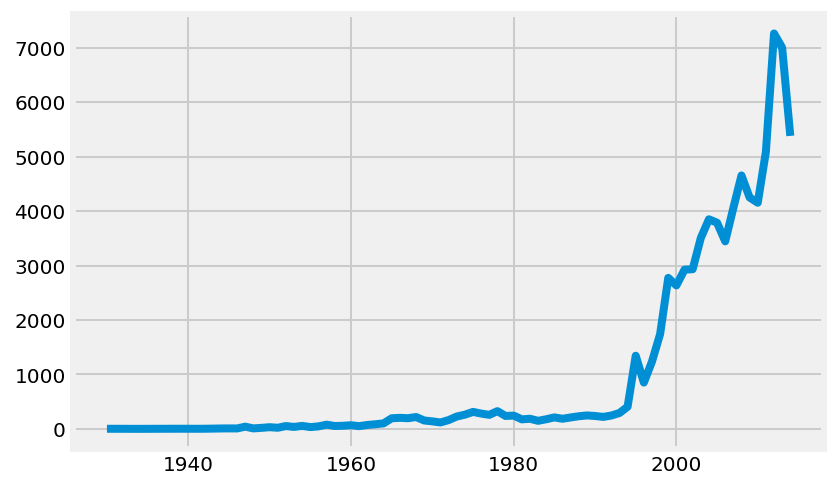

In [6]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot.line();

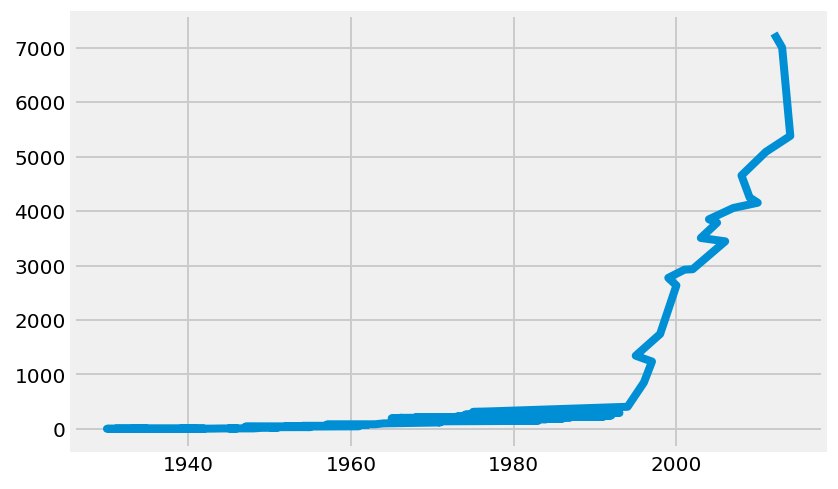

In [7]:
ufo.Year.value_counts().plot();

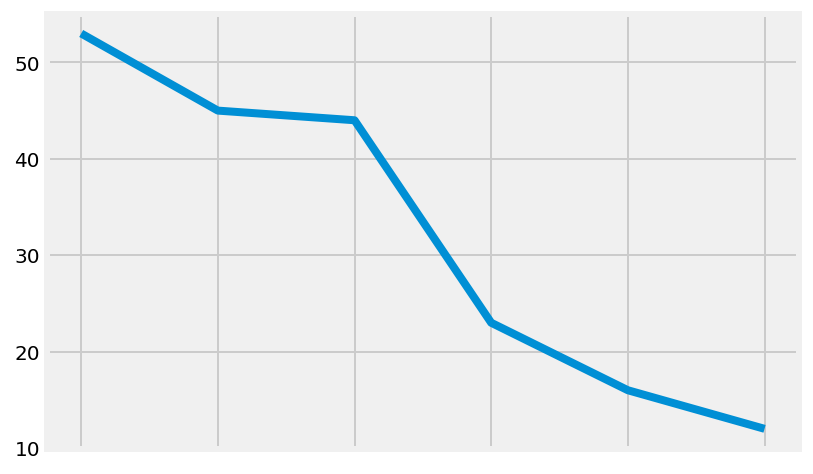

In [8]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot();

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

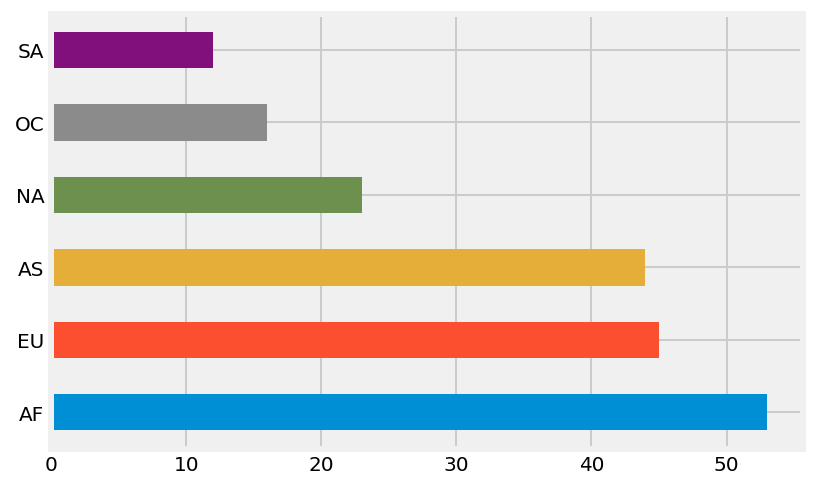

In [9]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
drinks.continent.value_counts().plot(kind='barh'); 

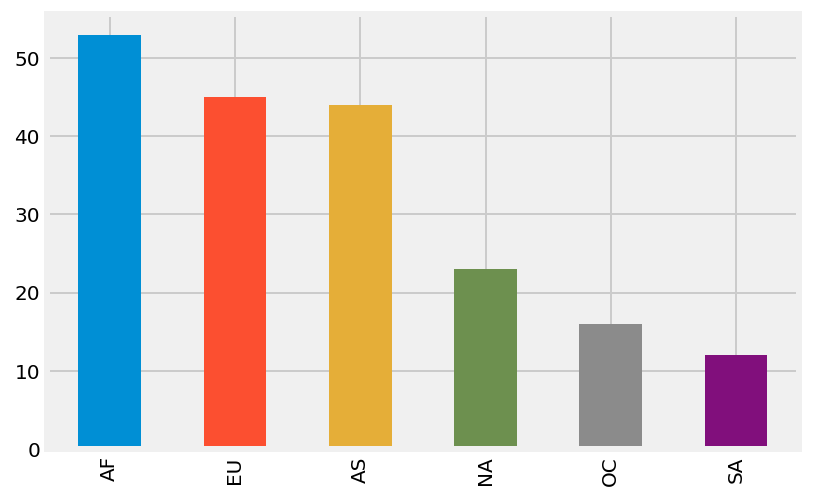

In [10]:
drinks.continent.value_counts().plot(kind='bar'); 

### Line Plot With a `DataFrame`

In [ ]:
df.plot();

### How to change the size of a plot

In [ ]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
#   The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) elsewhere
df.plot(figsize=(15,8)); # width, height

### How to change the color of a plot

In [ ]:
df['col1'].plot(color='crimson', figsize=(16,8));

### How to change the style of individual lines

In [ ]:
# : - dotted line, v - triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(15,7), style={'col1': ':r', 'col4': 'vb'});

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [ ]:
housing.head()

In [ ]:
housing[['ZN','INDUS']].plot(figsize=(12,8), style={'ZN':'g','INDUS':'--b'})

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [ ]:
# Count the number of countries in each continent.
drinks.continent.value_counts()

In [ ]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar', color='Aqua');
drinks.continent.value_counts().plot.bar(color=['purple','yellow','green'])

In [70]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

beer      spirit        wine    liters
continent                                              
AF          61.471698   16.339623   16.264151  3.007547
AS          37.045455   60.840909    9.068182  2.170455
EU         193.777778  132.555556  142.222222  8.617778
NA         145.434783  165.739130   24.521739  5.995652
OC          89.687500   58.437500   35.625000  3.381250
SA         175.083333  114.750000   62.416667  6.308333

In [ ]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

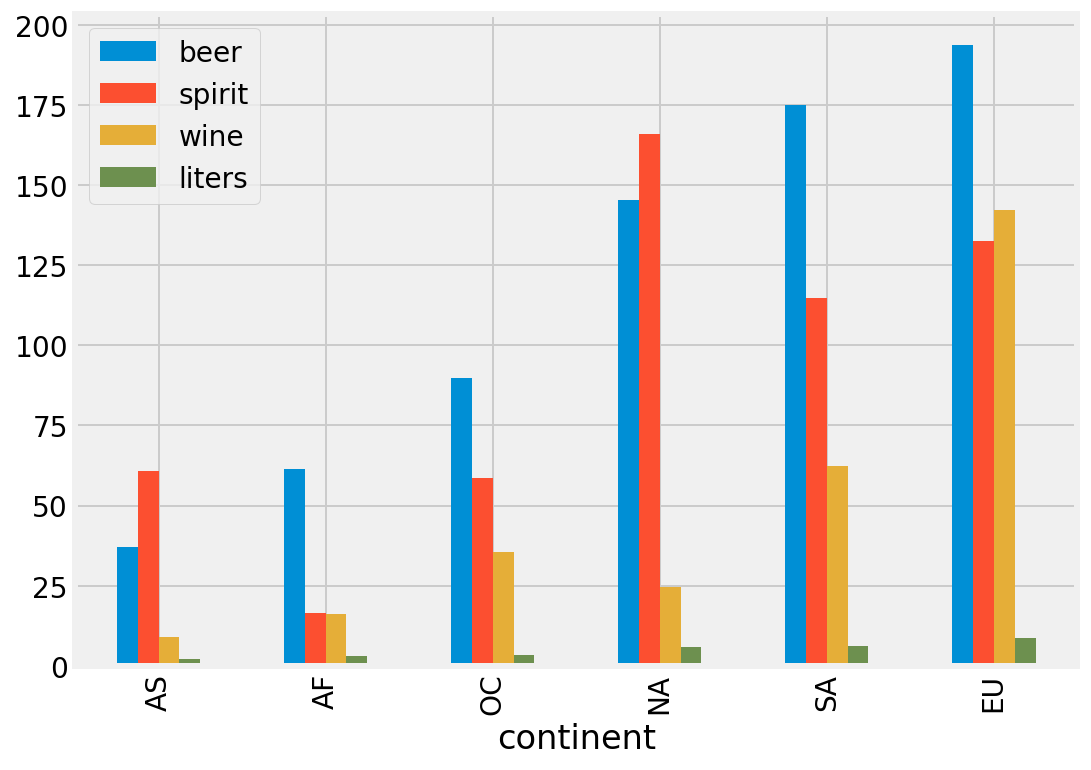

In [71]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

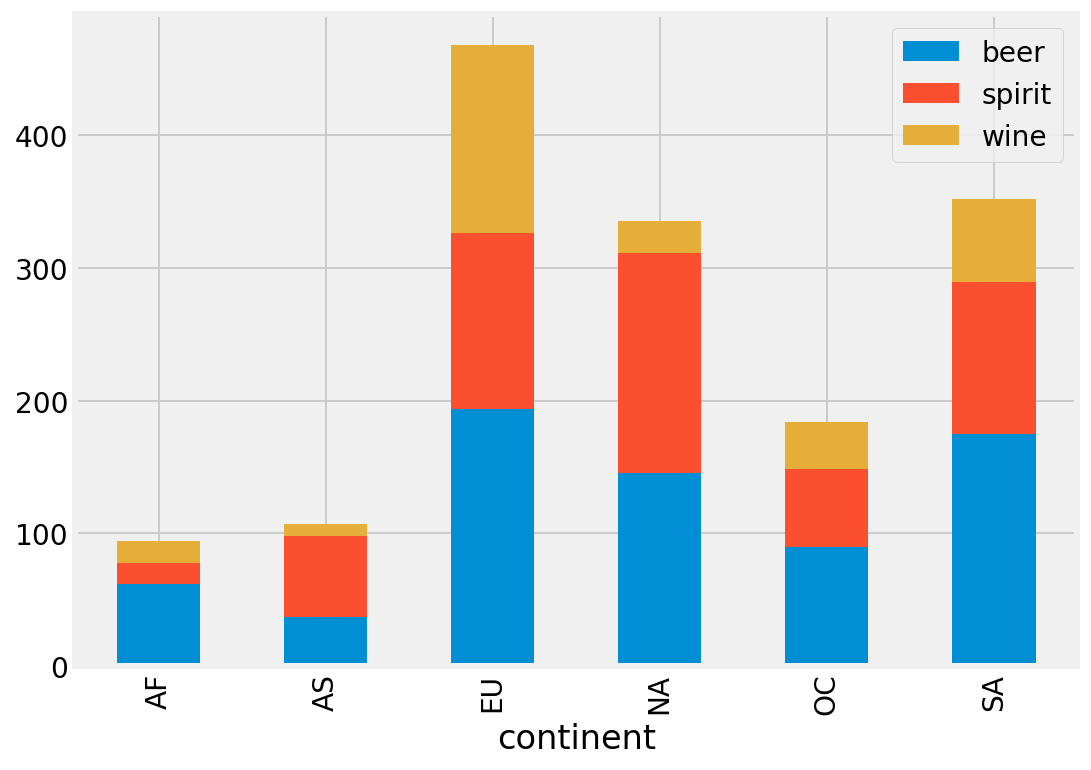

In [72]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

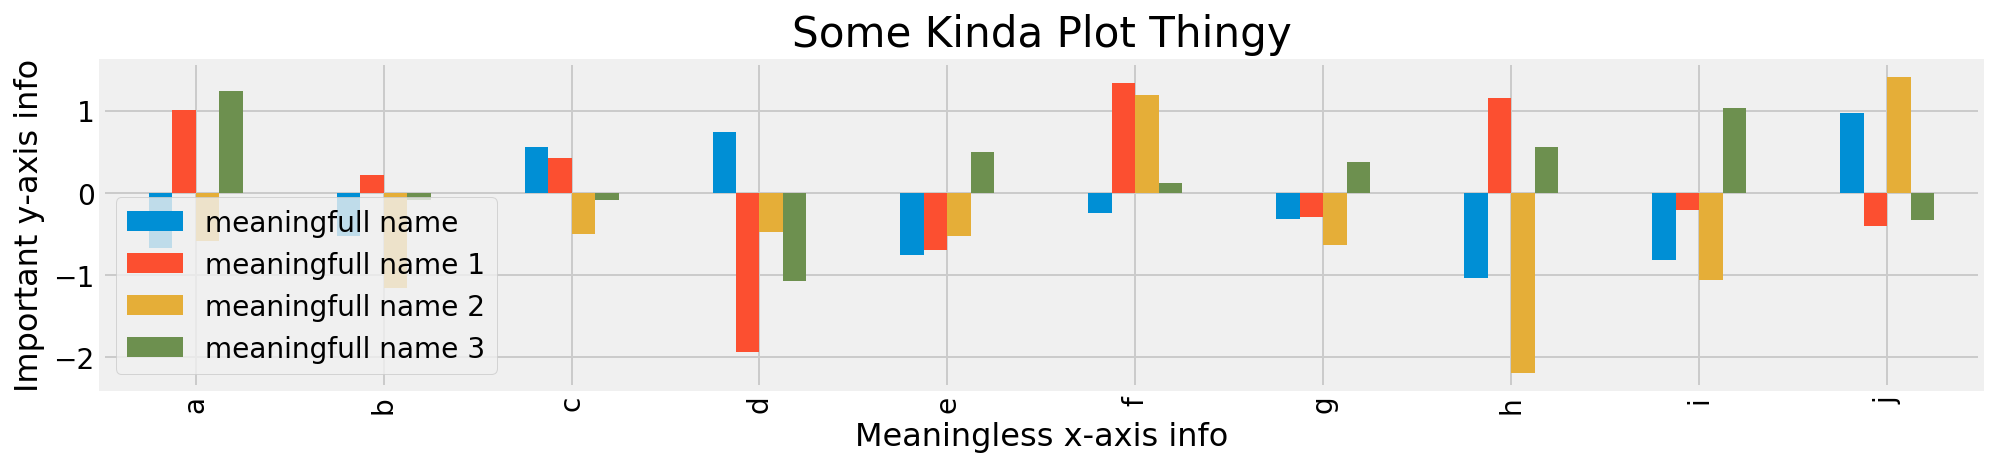

In [78]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

ax.legend(loc='lower left');

In [76]:
df.columns=['meaningfull name','meaningfull name 1','meaningfull name 2','meaningfull name 3']
df

meaningfull name  meaningfull name 1  meaningfull name 2  \
a         -0.676062            1.006336           -0.583712   
b         -0.523827            0.221419           -1.151205   
c          0.553205            0.417672           -0.503629   
d          0.735342           -1.938587           -0.479835   
e         -0.752911           -0.697186           -0.520156   
f         -0.249620            1.339254            1.182703   
g         -0.316760           -0.288430           -0.634125   
h         -1.036337            1.146556           -2.188869   
i         -0.821473           -0.207401           -1.056360   
j          0.964233           -0.406655            1.413150   

   meaningfull name 3  
a            1.234001  
b           -0.084365  
c           -0.086537  
d           -1.067771  
e            0.493129  
f            0.124433  
g            0.380139  
h            0.554603  
i            1.033697  
j           -0.327052

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

In [79]:
ax = df[['col1', 'col2']].plot(kind='barh', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

#y-axis labelsax.set_xlabel('Meaningless x-axis info', fontsize=16);

#data=pd.Dataframe({'feature 1':np.log(df['meaningfull name']),
  #                                  'feature 2': df['meaningfull name2']})
#        data.plot()


KeyError: "['col1' 'col2'] not in index"

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

### Stacked works on horizontal bar charts.

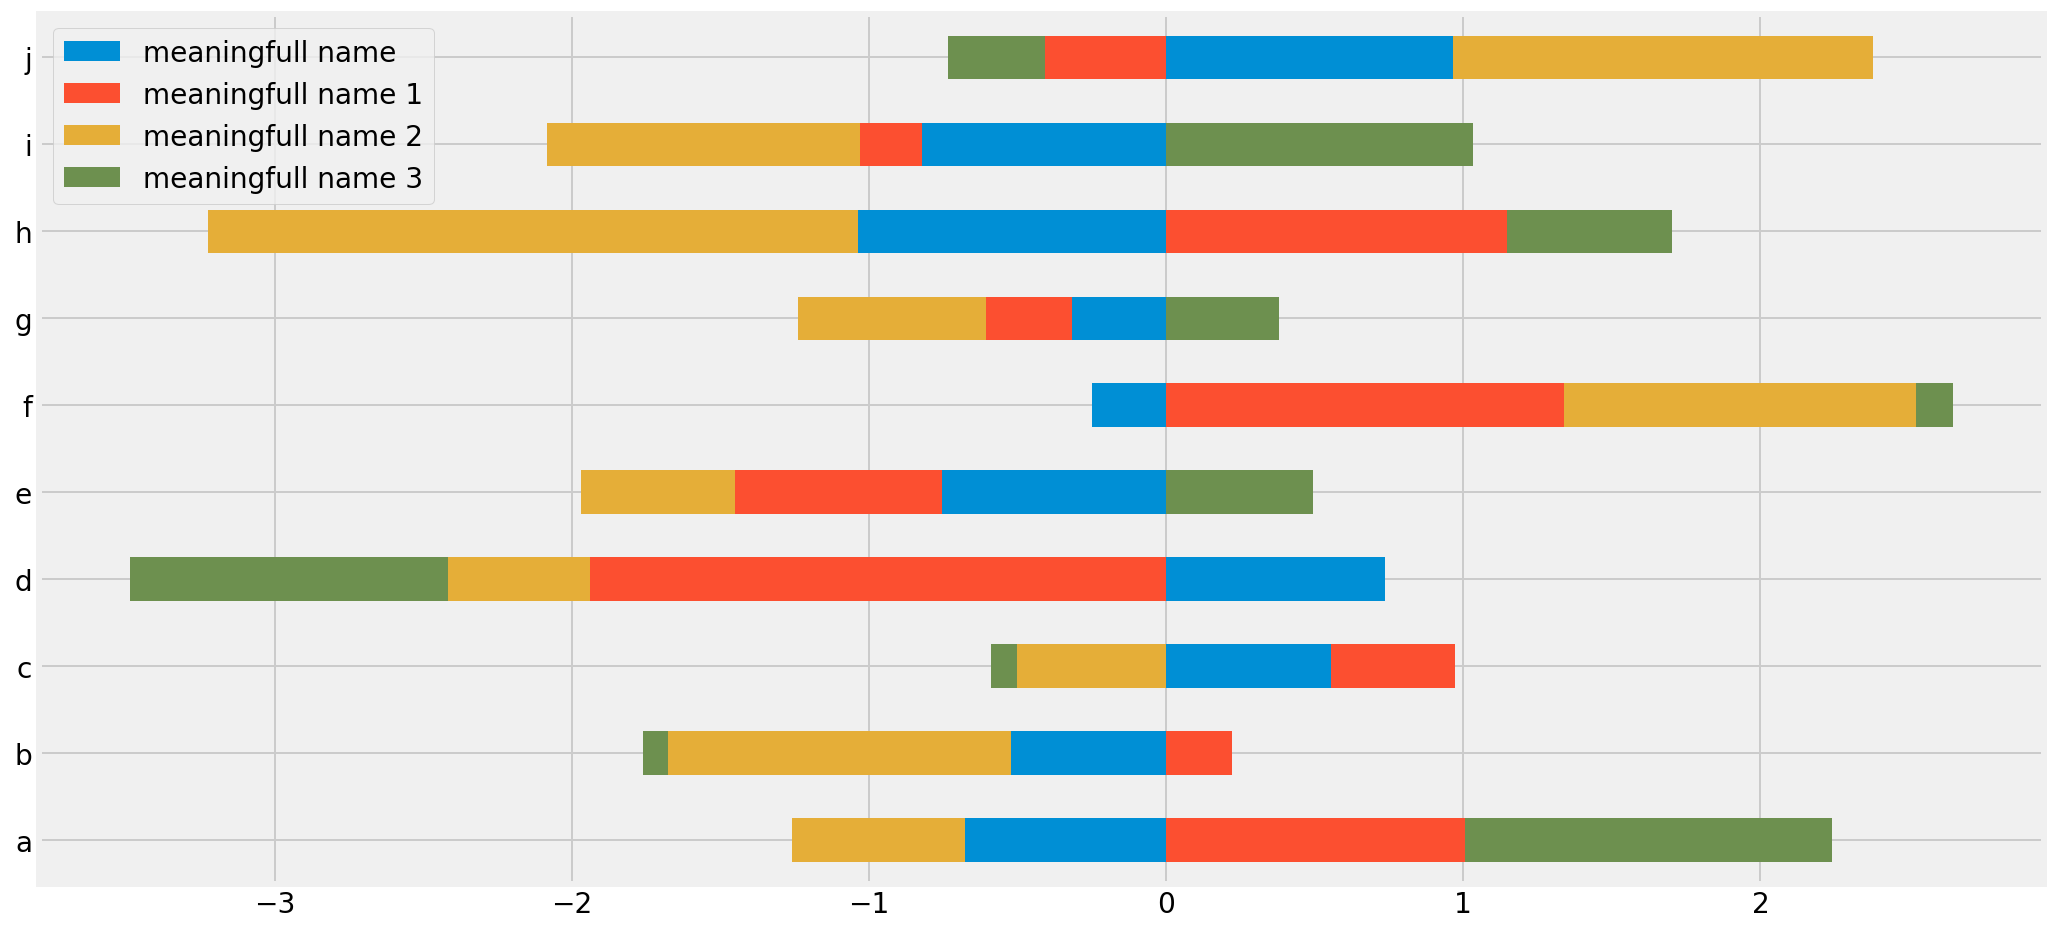

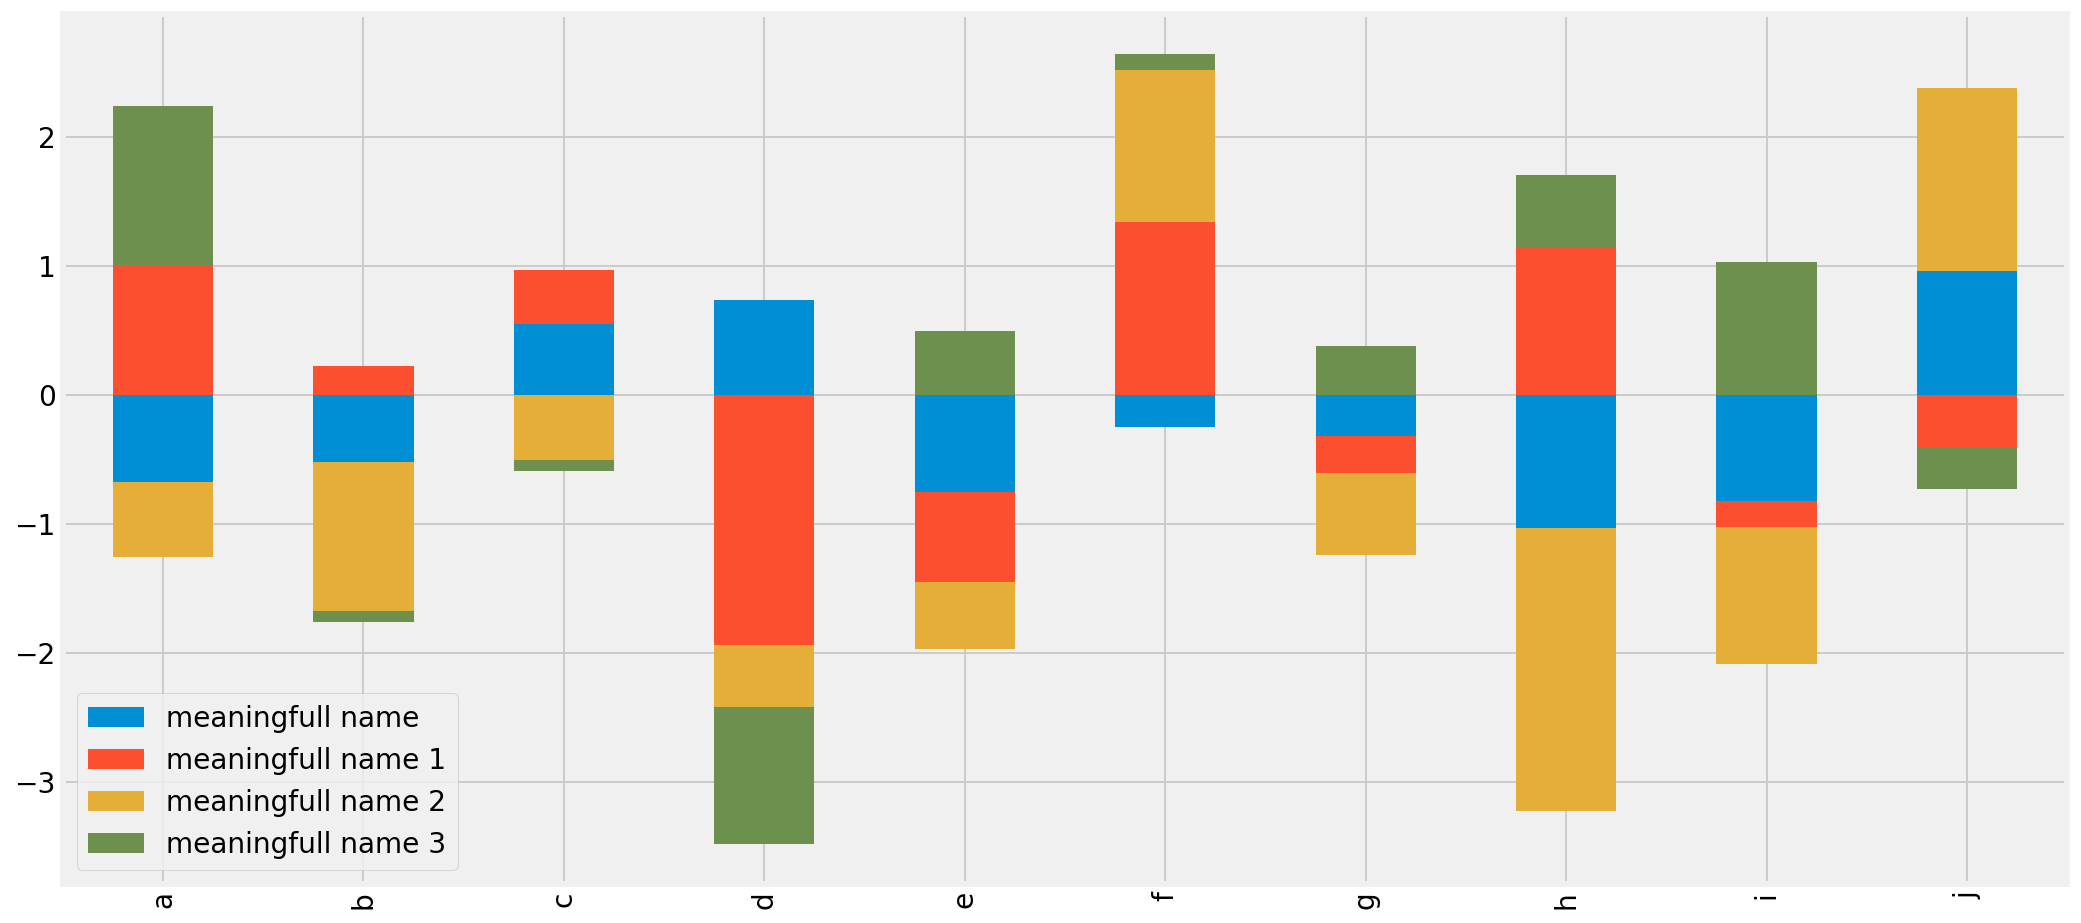

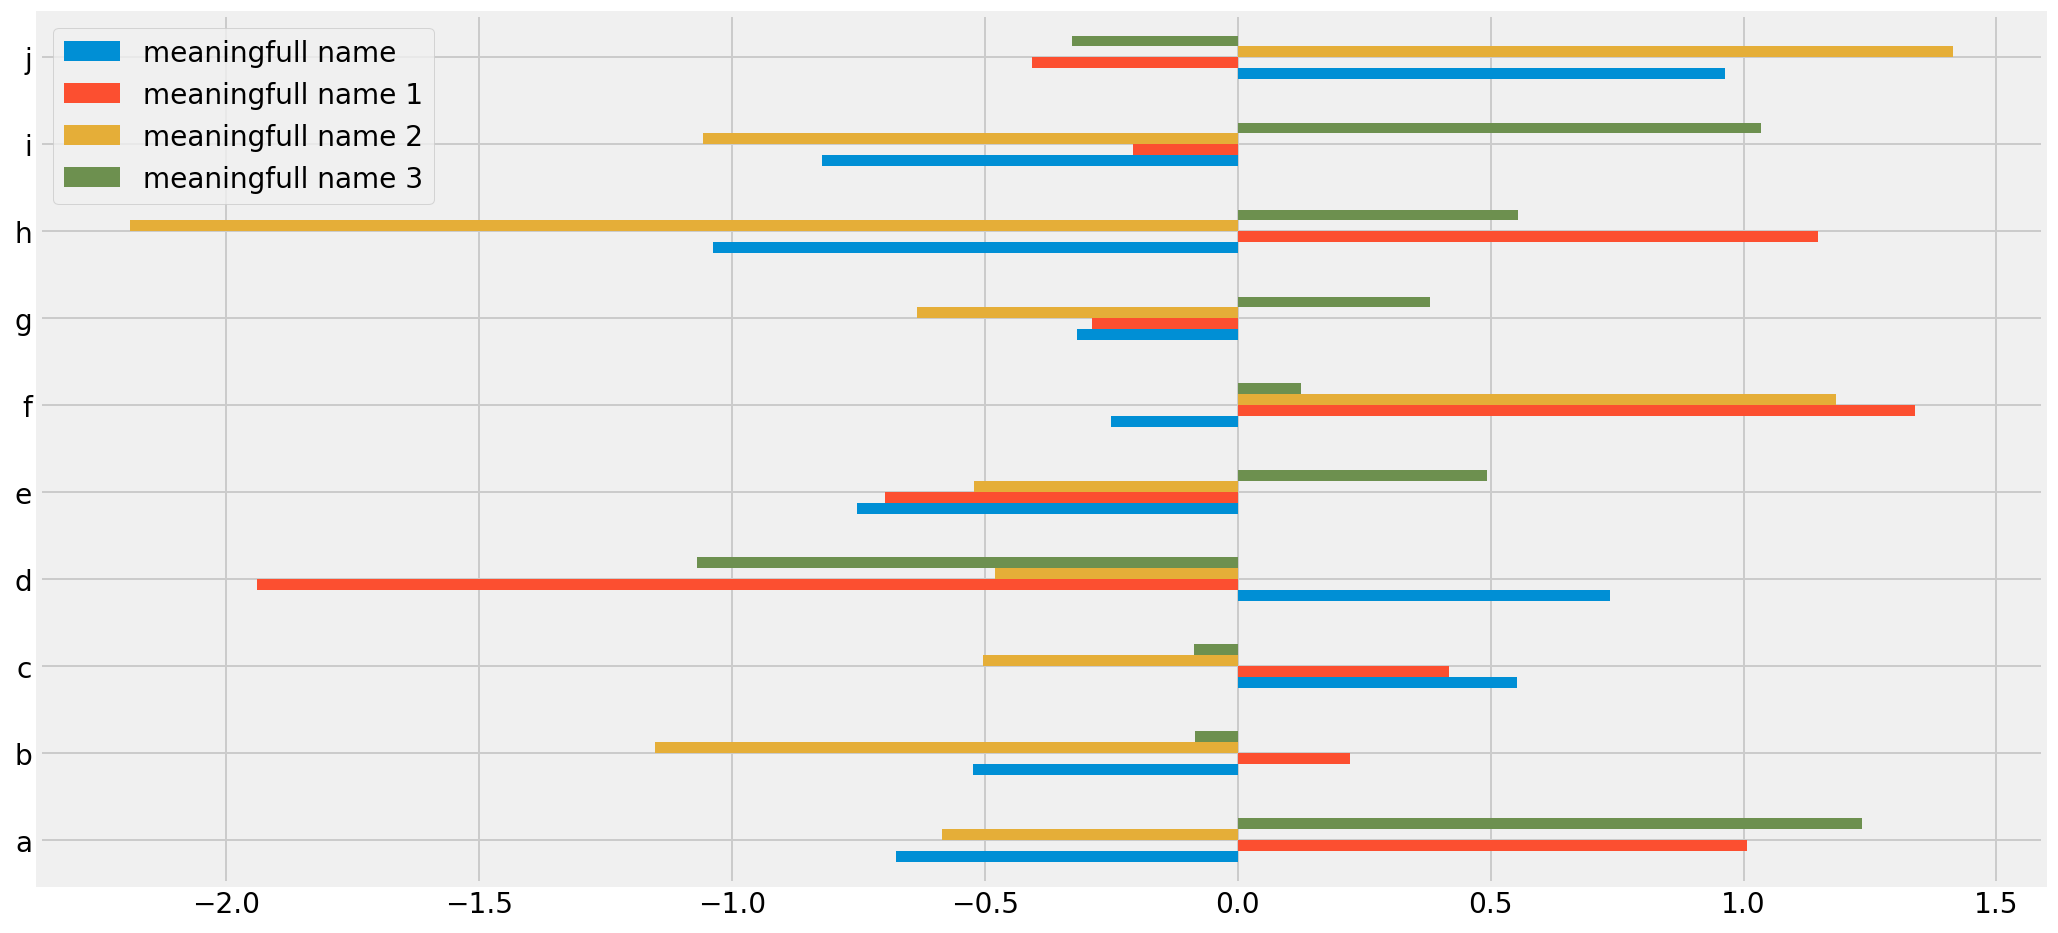

In [80]:
df.plot(kind='barh', stacked=True, figsize=(16,8));
df.plot(kind='bar', stacked=True, figsize=(16,8));
df.plot(kind='barh', stacked=False, figsize=(16,8));
#use log transformation 

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [82]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

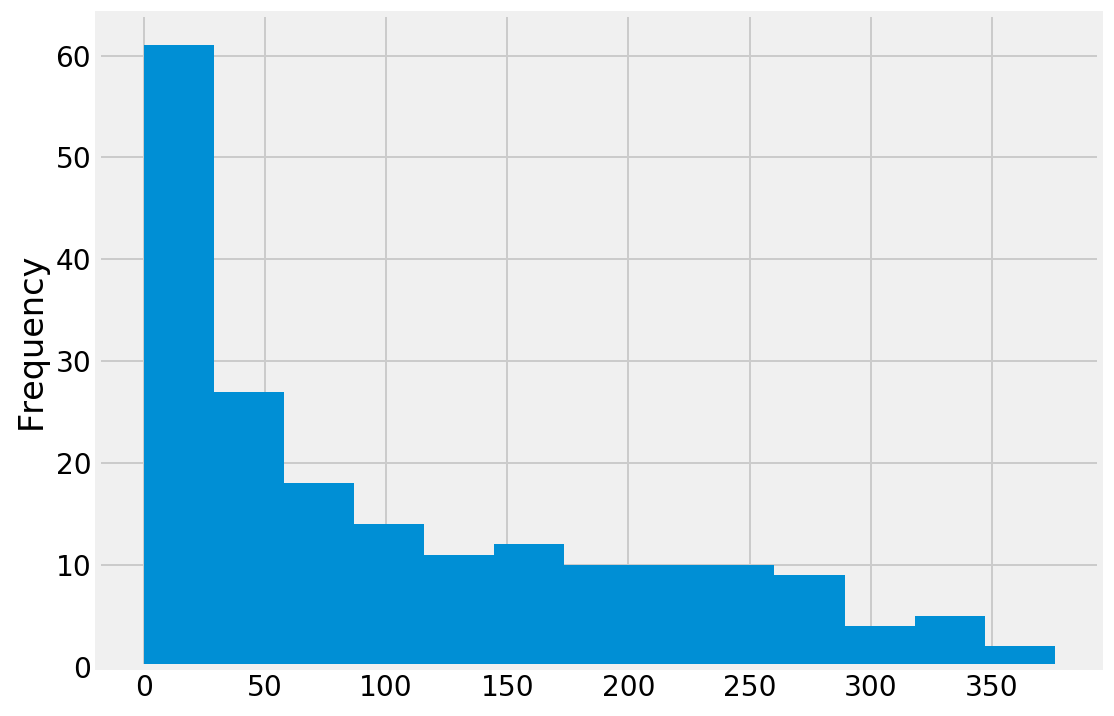

In [86]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
#square root of number of observations
drinks.beer.plot(kind='hist', bins=int(np.sqrt(drinks.shape[0])));
#long tail distribution, centered around 0, little countries have large consumption 

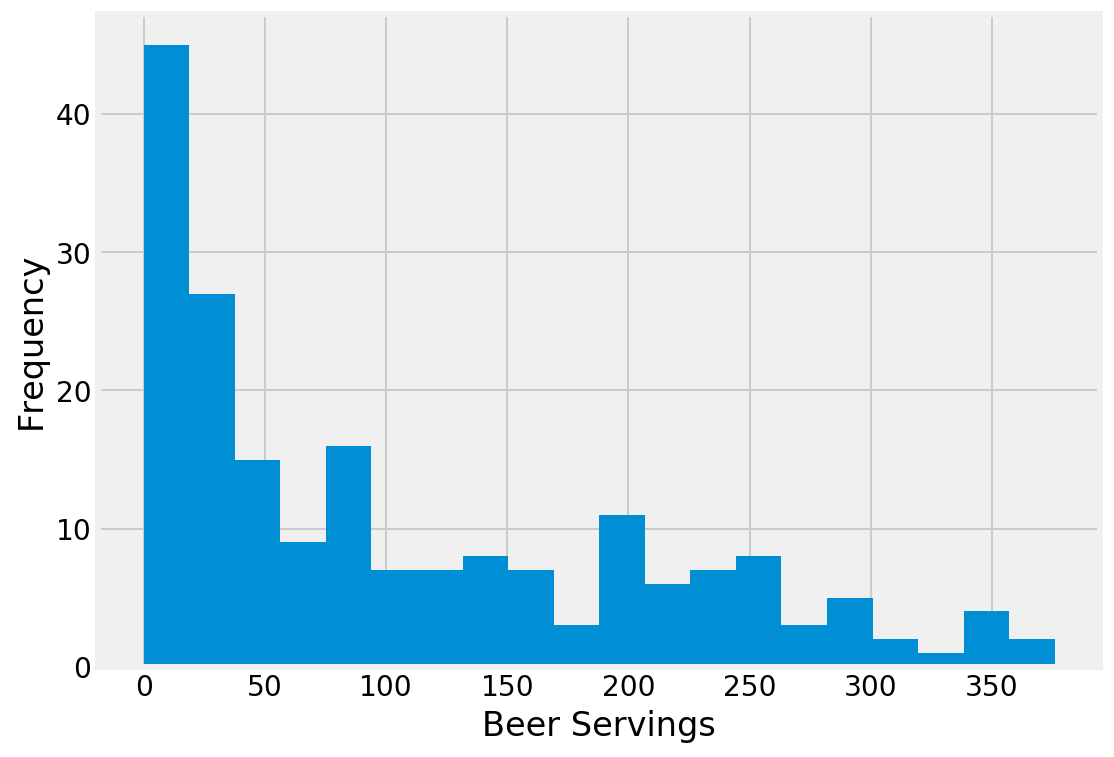

In [87]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20)#, x='Beer', y='Freq');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
#uniform distribution, all population has same value, will be a horizontal straight line 


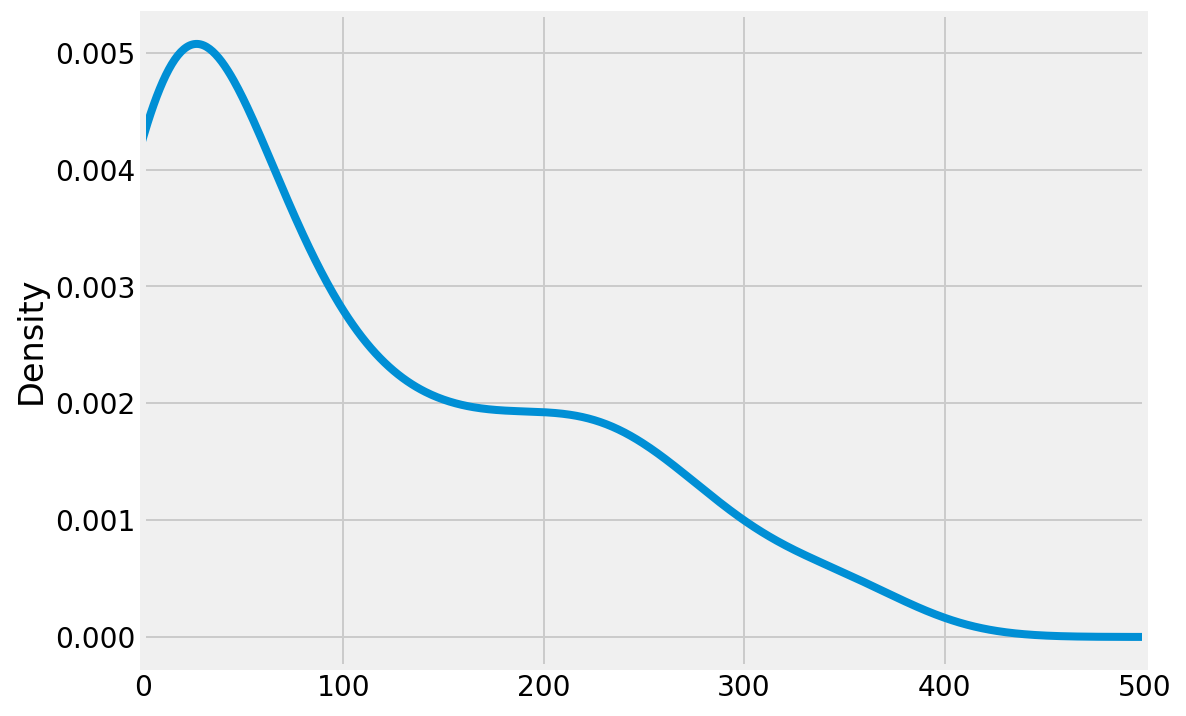

In [88]:
# Compare with density plot (smooth version of a histogram).
drinks.beer.plot(kind='density', xlim=(0, 500));

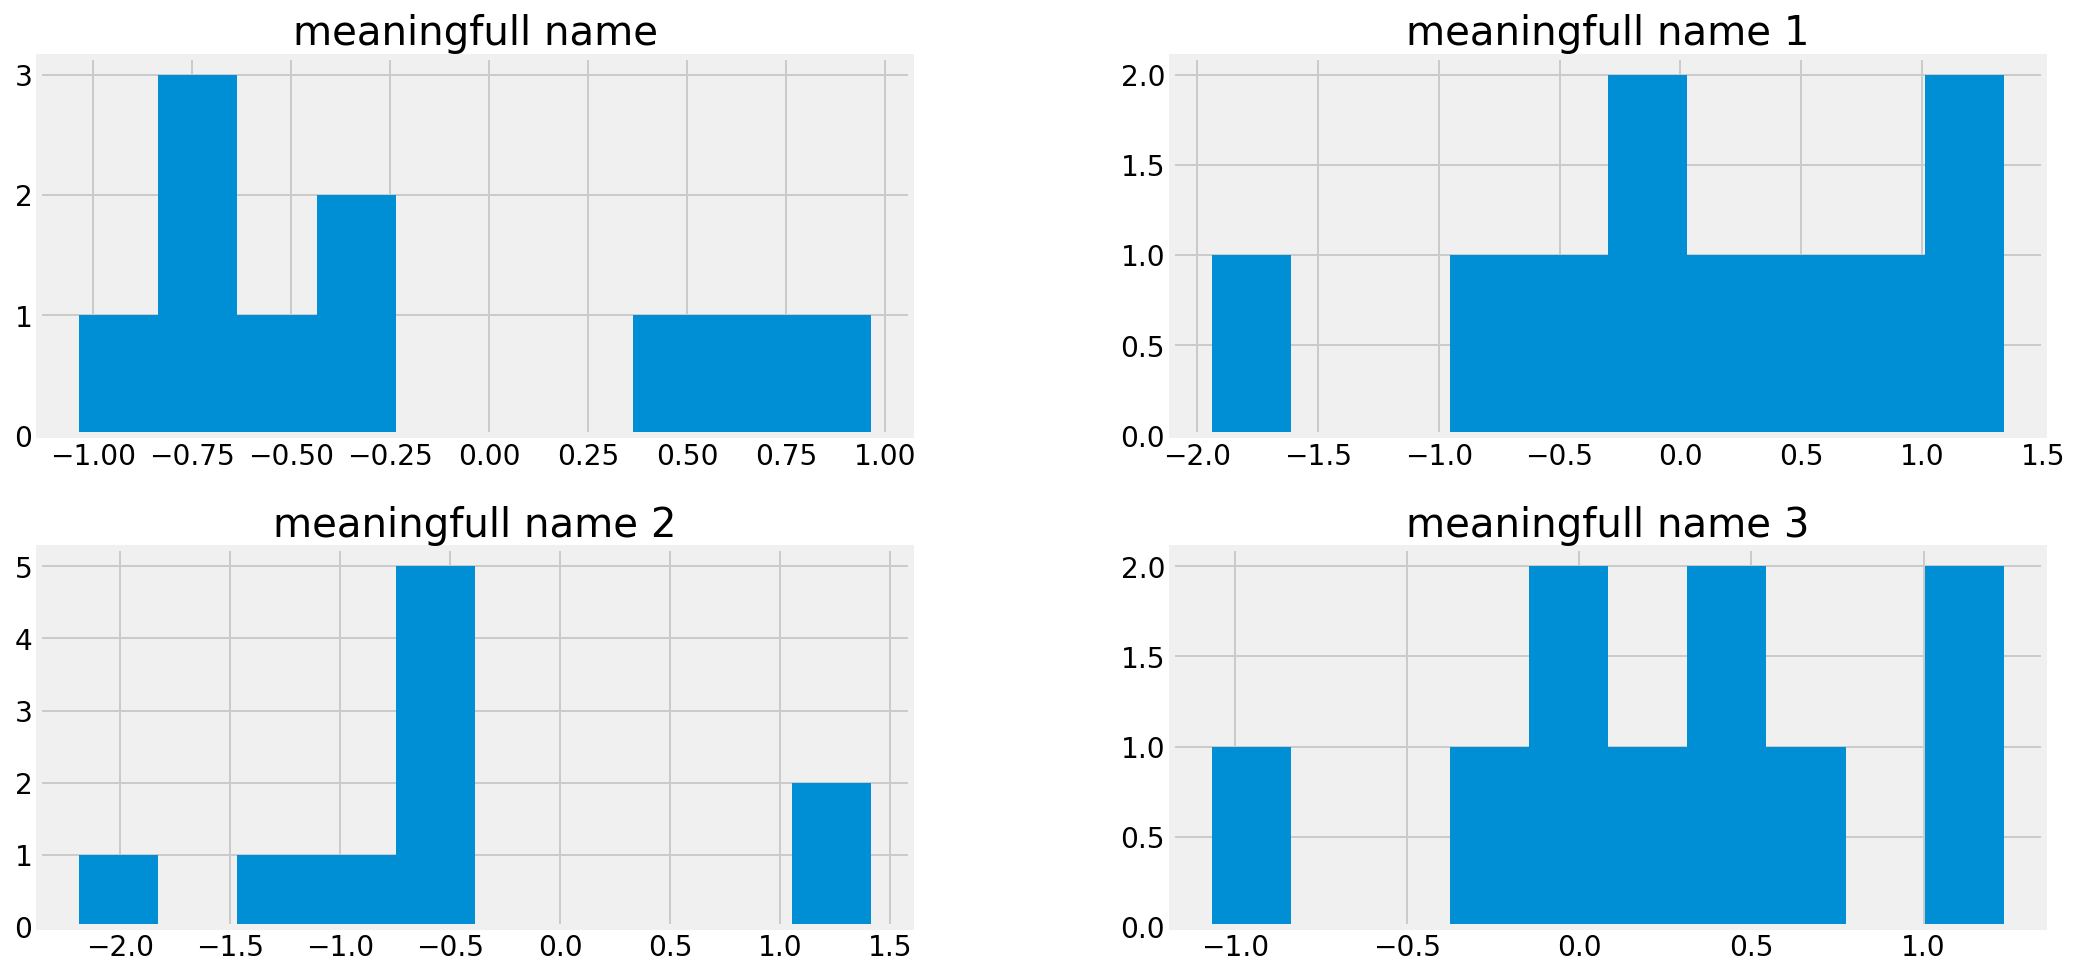

In [89]:
# Making histograms of DataFrames — histogram of random data
df.hist(figsize=(16,8));

### Single Histogram

In [90]:
norm = np.random.standard_normal(5000)
type(norm)

numpy.ndarray

In [91]:
type(pd.Series(norm))#.hist(figsize=(16,4), bins=50);

pandas.core.series.Series

### Another bins example: Sometimes the binning makes the data look different or misleading.

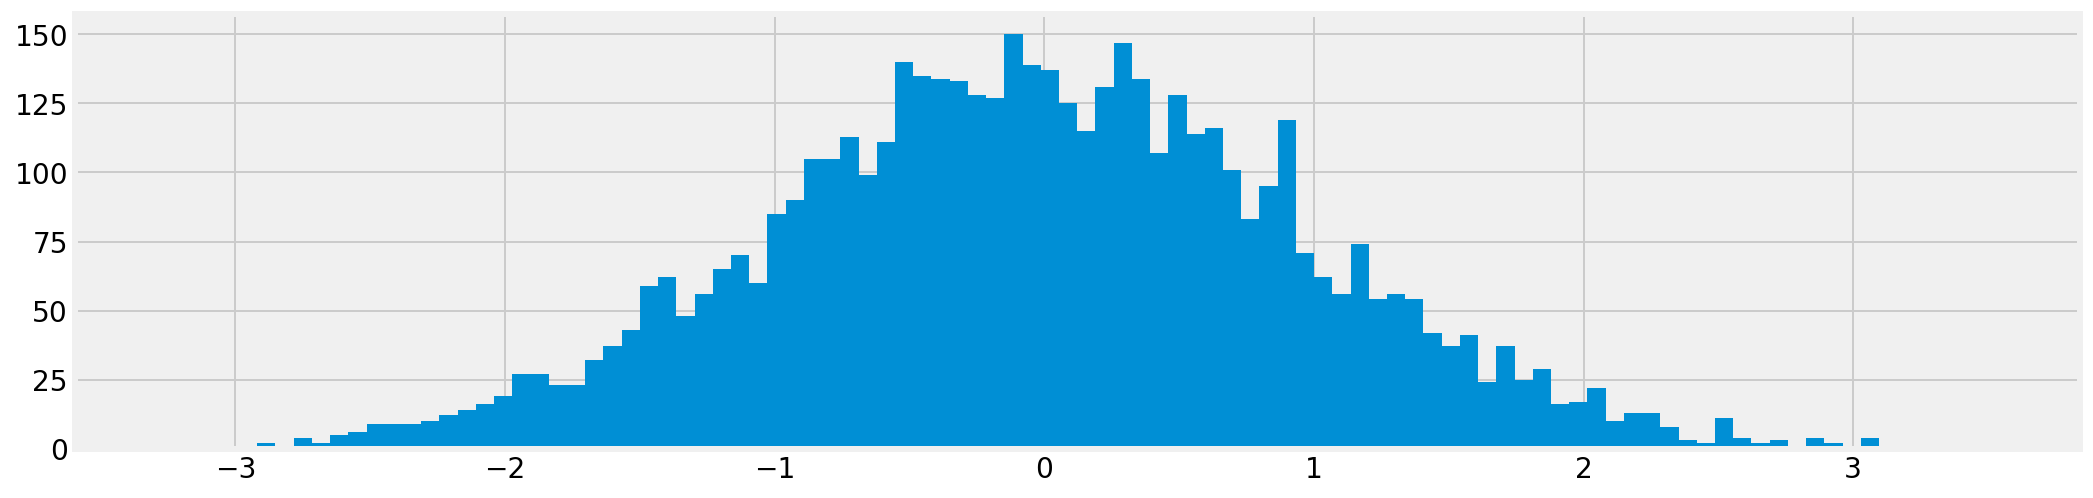

In [94]:
pd.Series(norm).hist(figsize=(16,4), bins=100);

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

In [ ]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

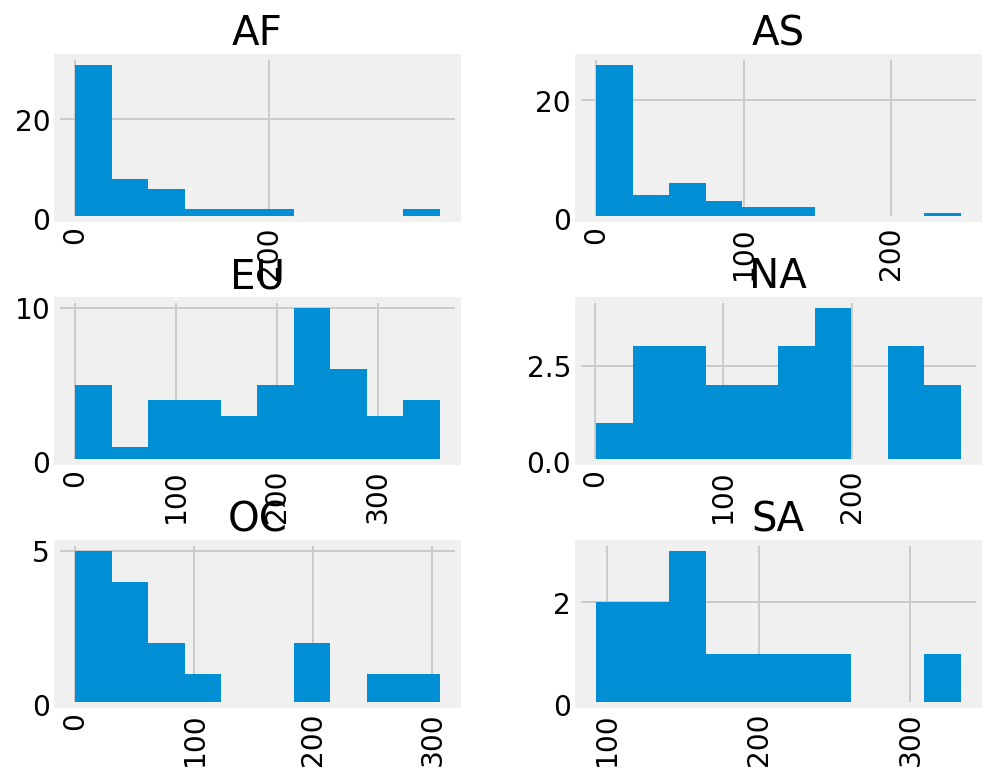

In [96]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column='beer', by='continent');

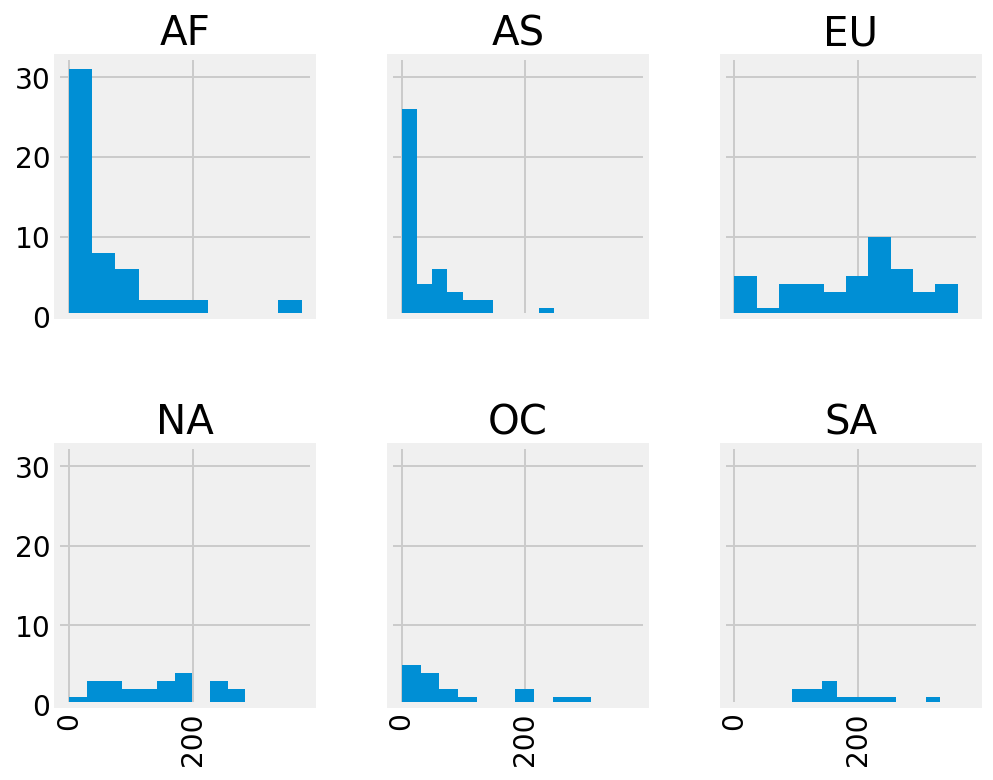

In [97]:
# Share the x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value
- same as describe()

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

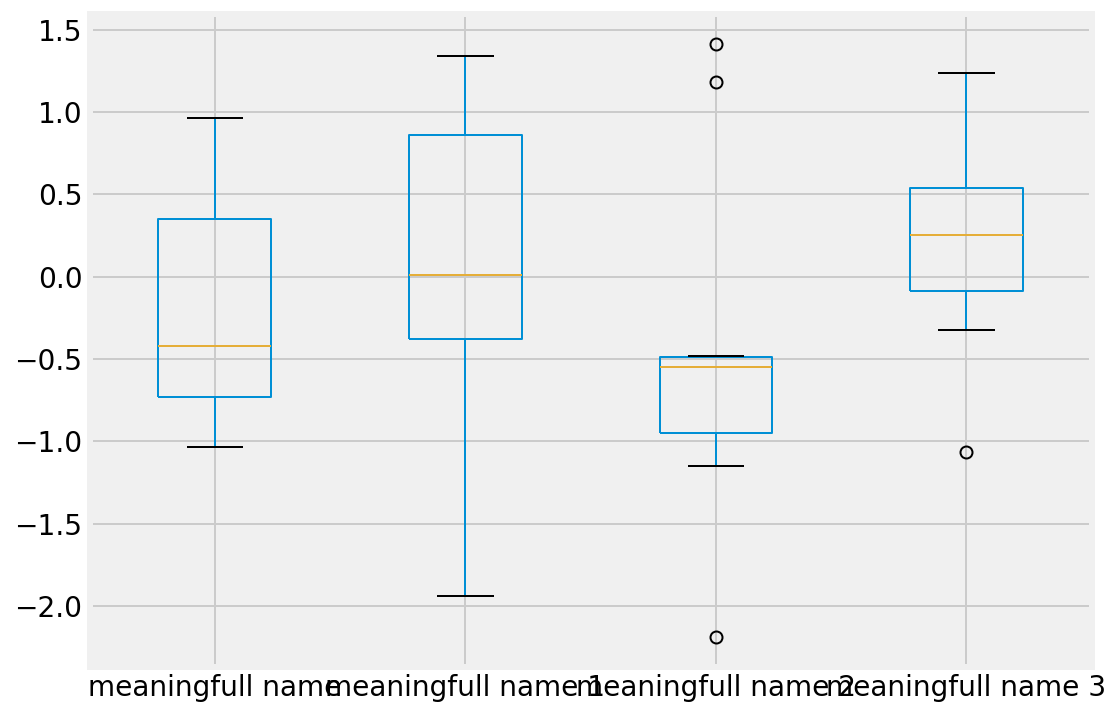

In [98]:
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [ ]:
# Sort the spirit column.
drinks.spirit.sort_values().values

In [ ]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

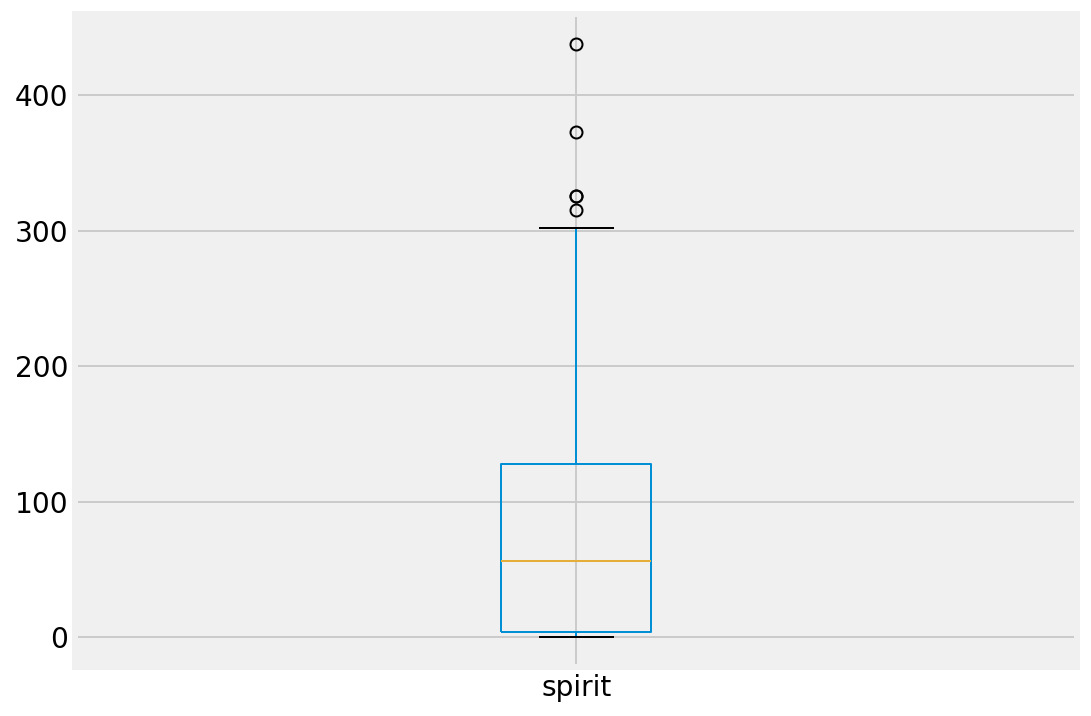

In [99]:
# Compare with box plot.
drinks.spirit.plot(kind='box');

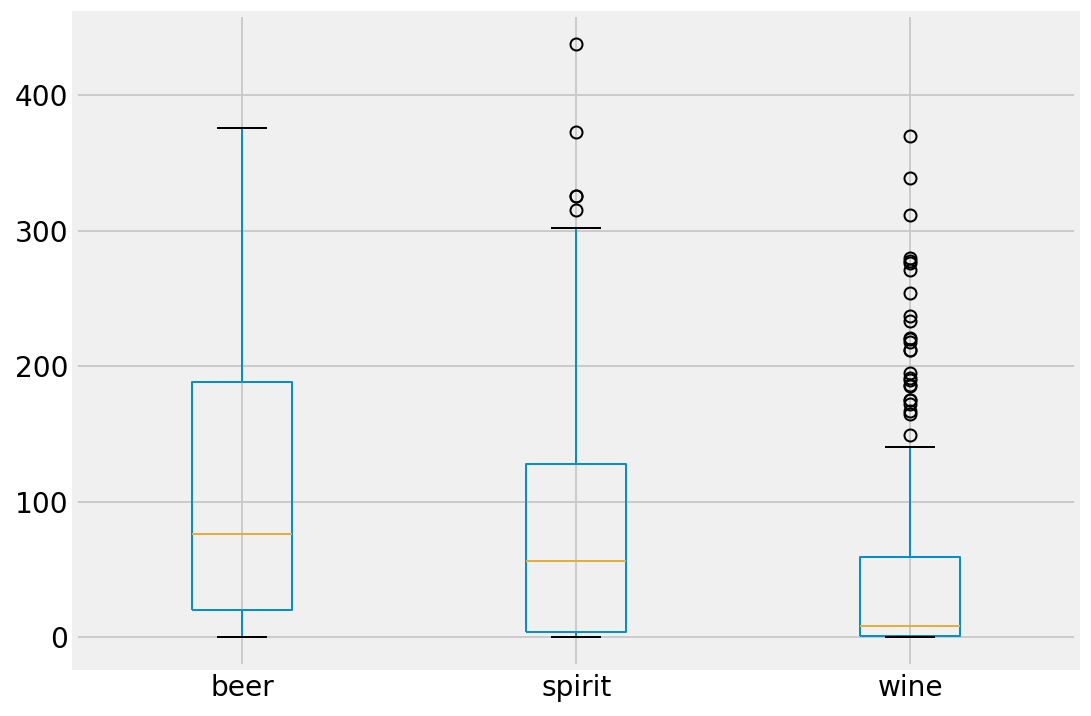

In [100]:
# Include multiple variables.
drinks.drop('liters', axis=1).plot(kind='box');

#for beer, spirit, can use linear regression; wine has too many outliers (not normally distributed)

### How to use a box plot to preview the distributions in the housing data

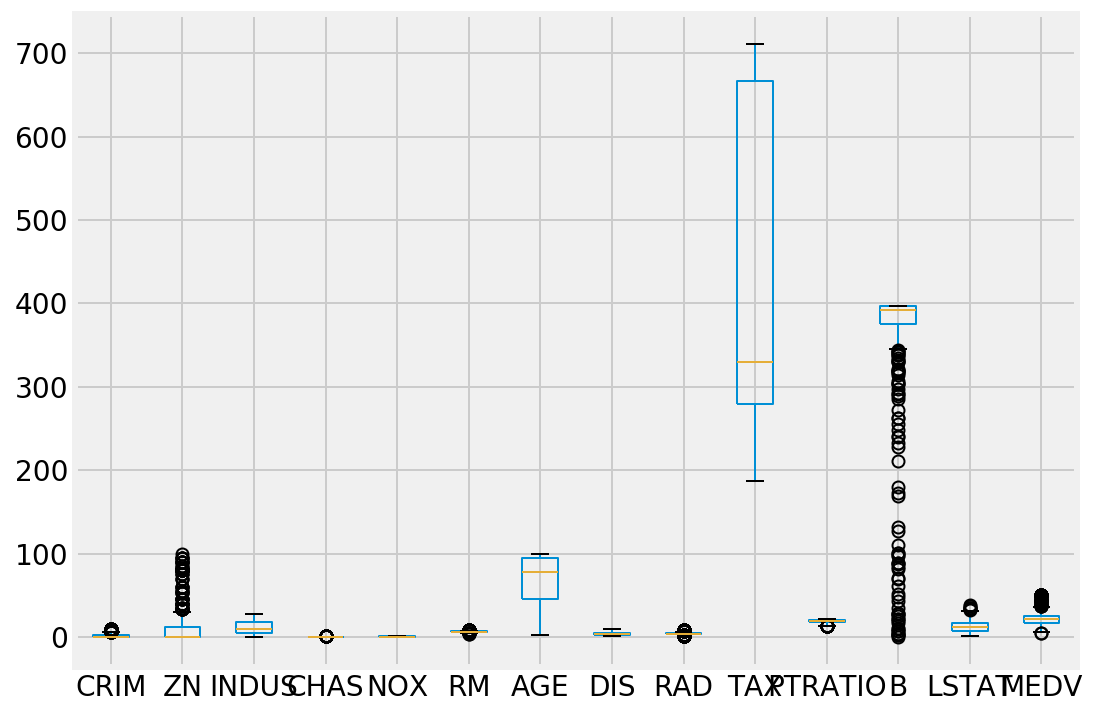

In [102]:
housing.boxplot();

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

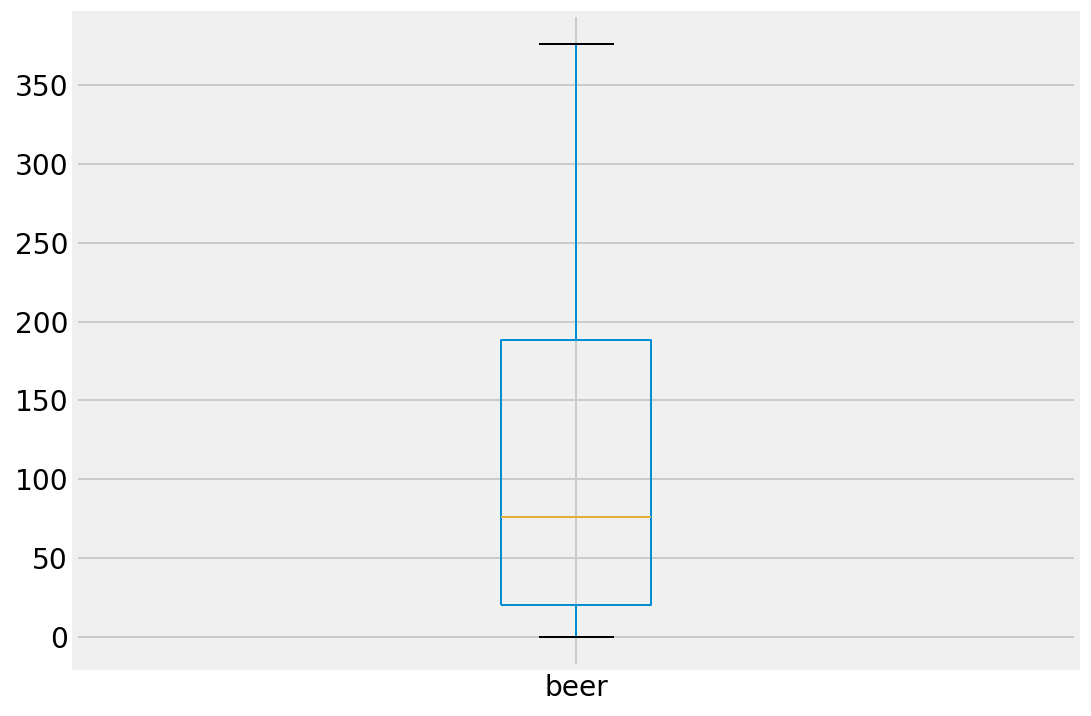

In [103]:
# Reminder: box plot of beer servings
drinks.beer.plot(kind='box');

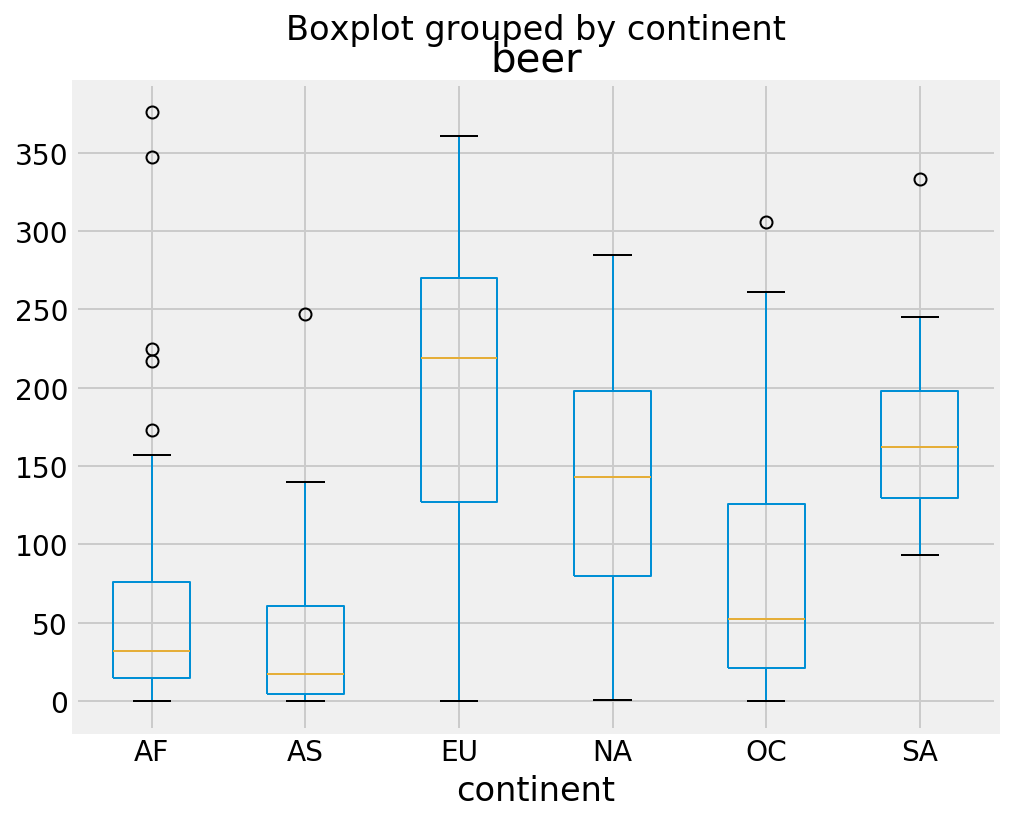

In [104]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

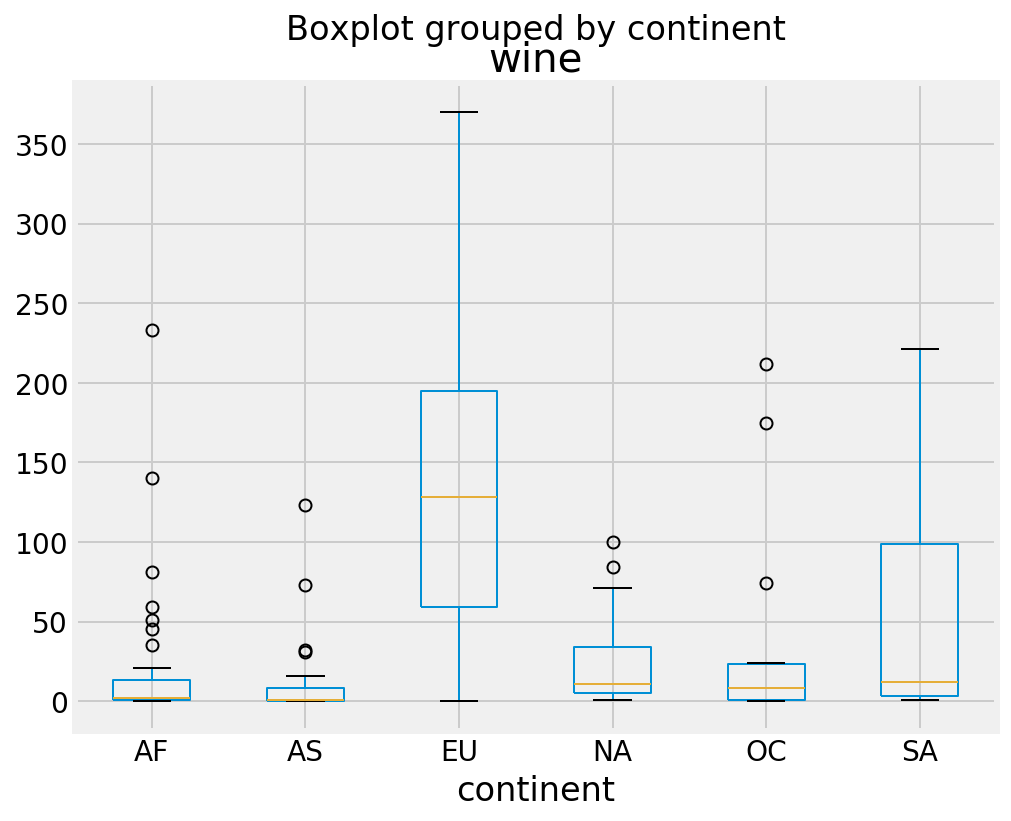

In [112]:
drinks.boxplot(column='wine', by='continent');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27f2e080>,
      dtype=object)

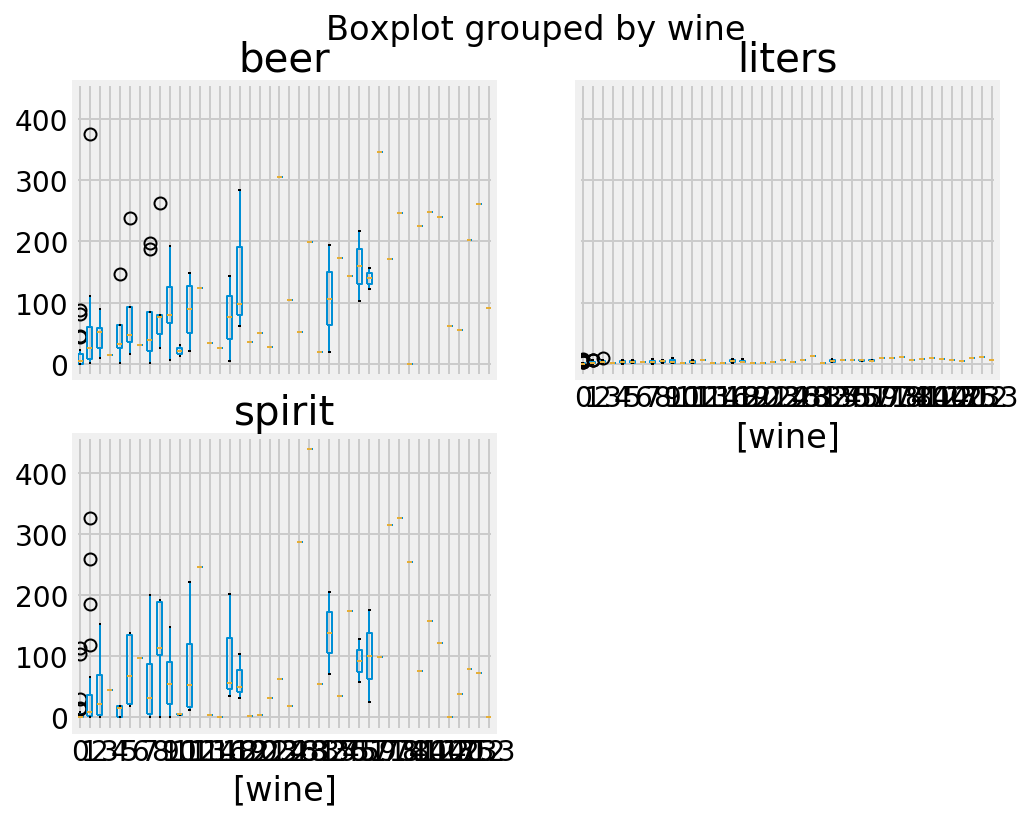

In [114]:
drinks[-drinks['continent'].isin(['SA','EU'])].boxplot(by='wine')
#remove sa and eu

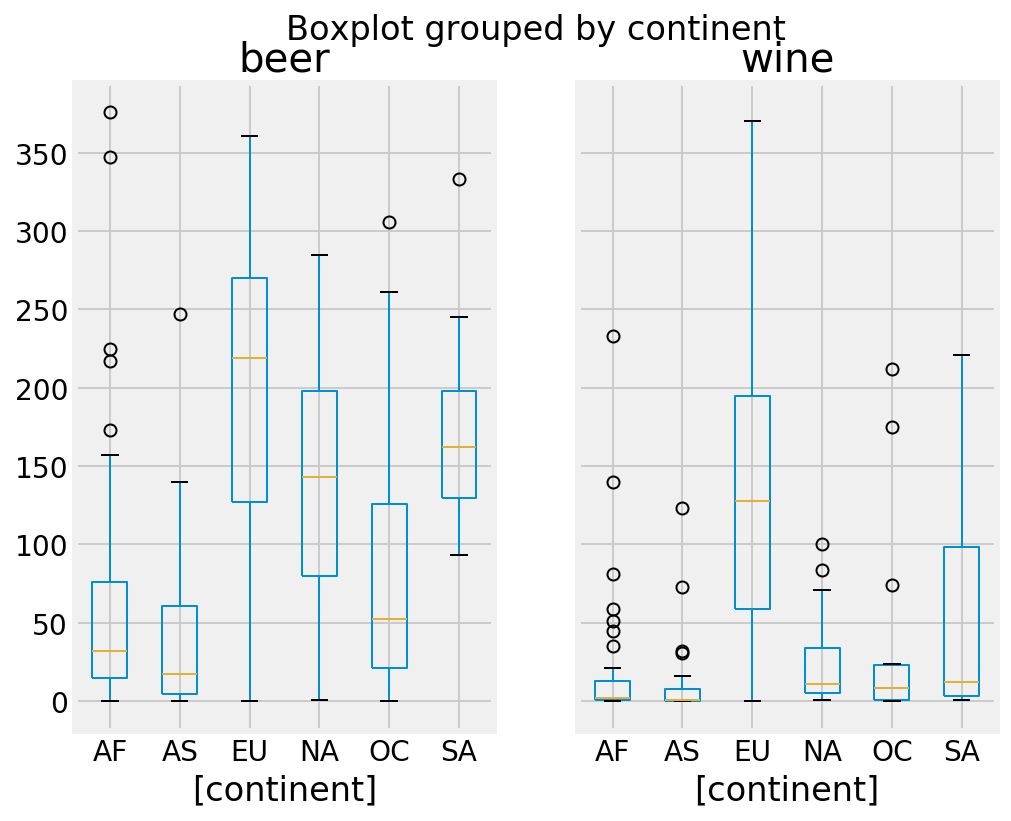

In [113]:
# Box plot of all numeric columns grouped by continent
drinks[['beer','wine','continent']].boxplot(by='continent');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [115]:
# Select the beer and wine columns and sort by beer.
#histogram, single numerical; scatter, 2 relationship 
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

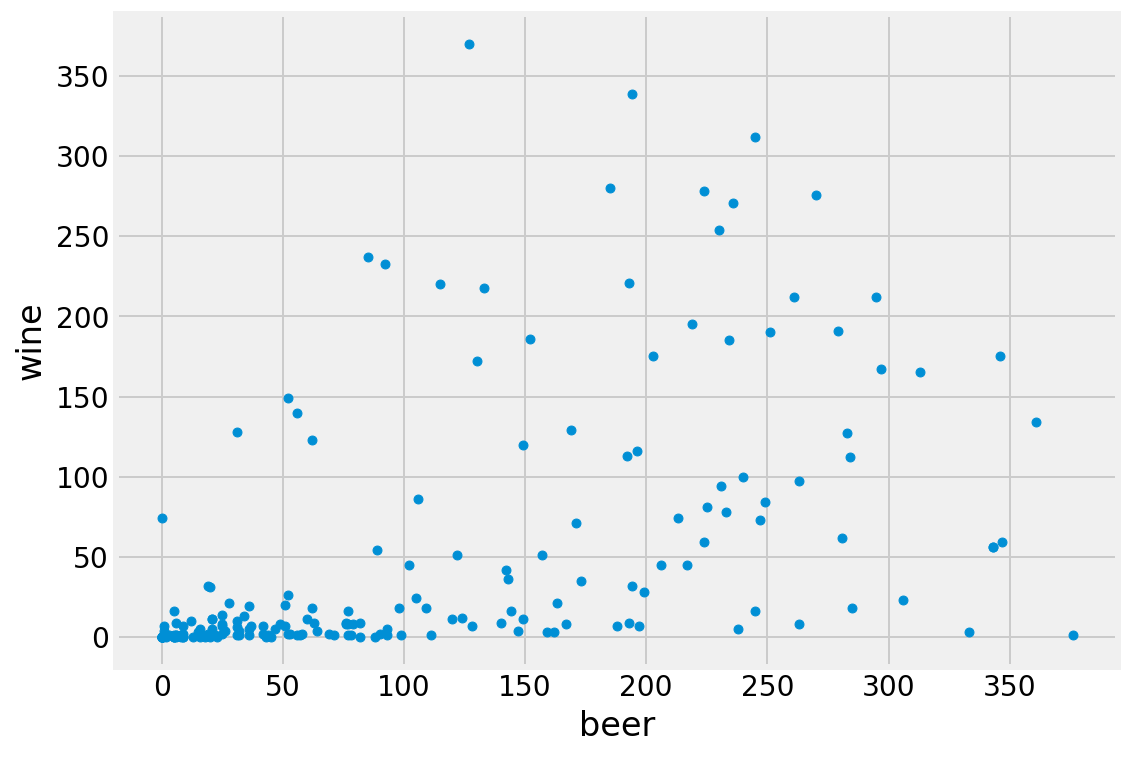

In [116]:
# Compare with scatter plot.
#drop datapoints to find relationship

drinks.plot(kind='scatter', x='beer', y='wine');

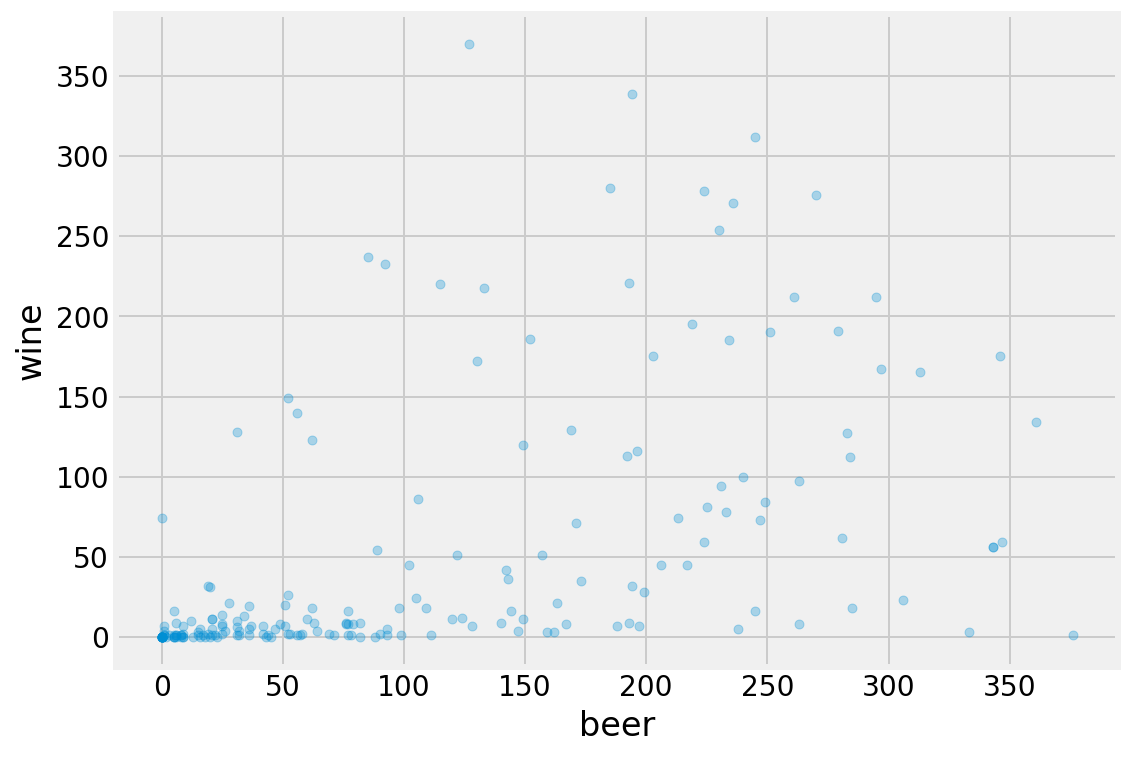

In [117]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!). reach dark, need more overlap 
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

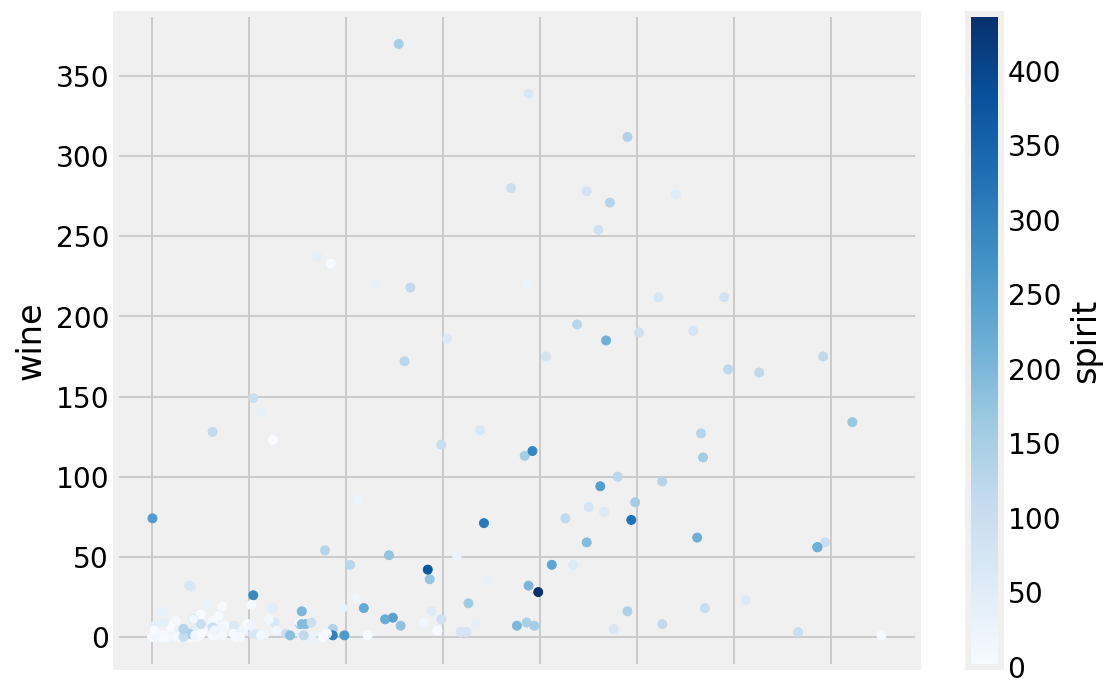

In [118]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

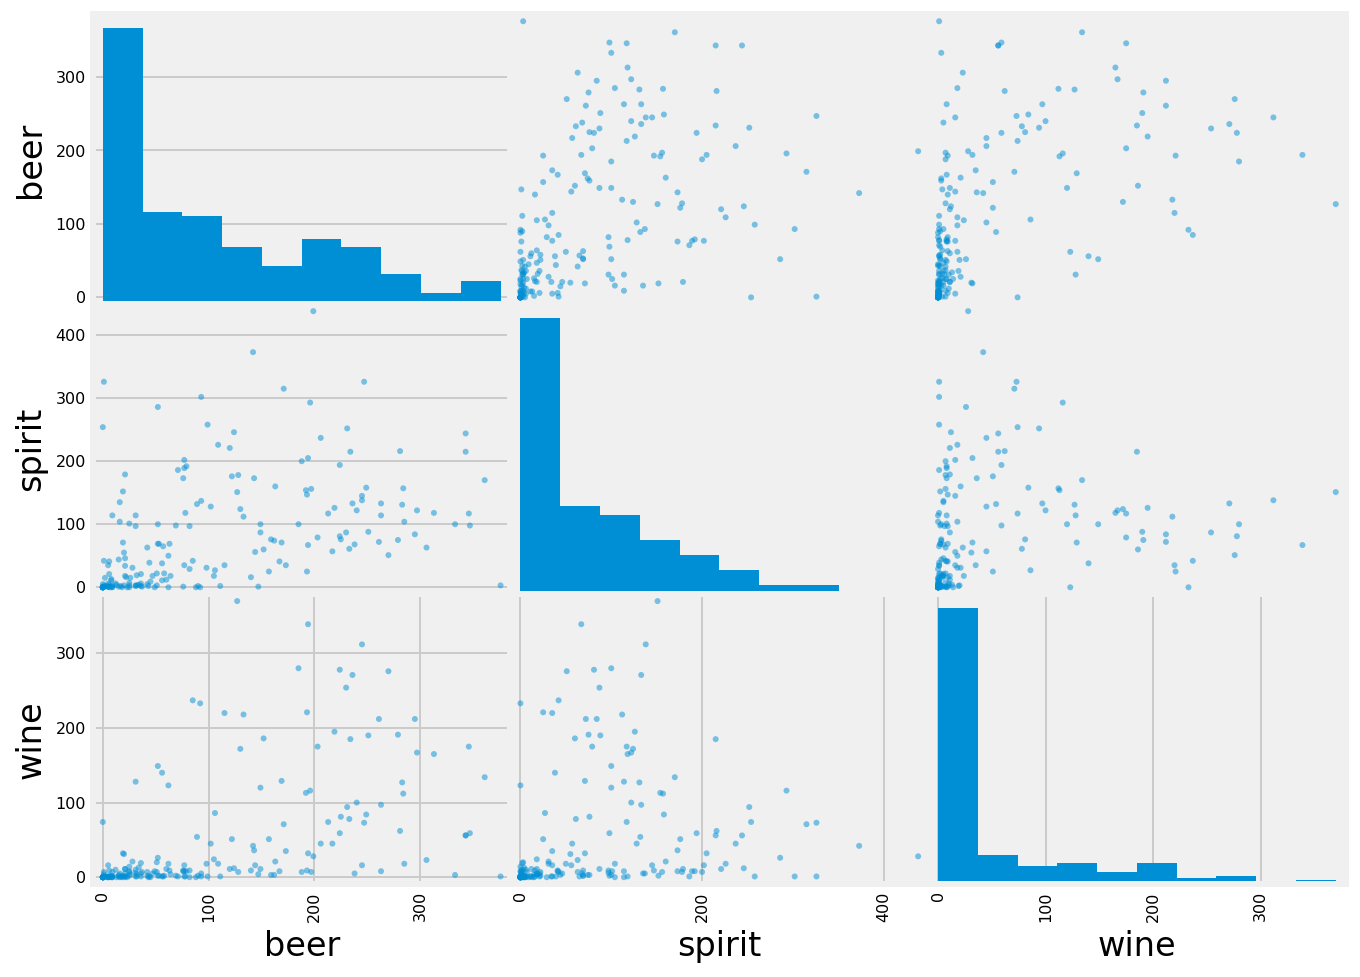

In [122]:
# Scatter matrix of three numerical columns. best plot to use
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

### Plotting `DataFrames`

In [125]:
df.plot(x=df.column[0], y=df.column[1], kind='scatter', color='dodgerblue',
        figsize=(15,7), s=250);

AttributeError: 'DataFrame' object has no attribute 'column'

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

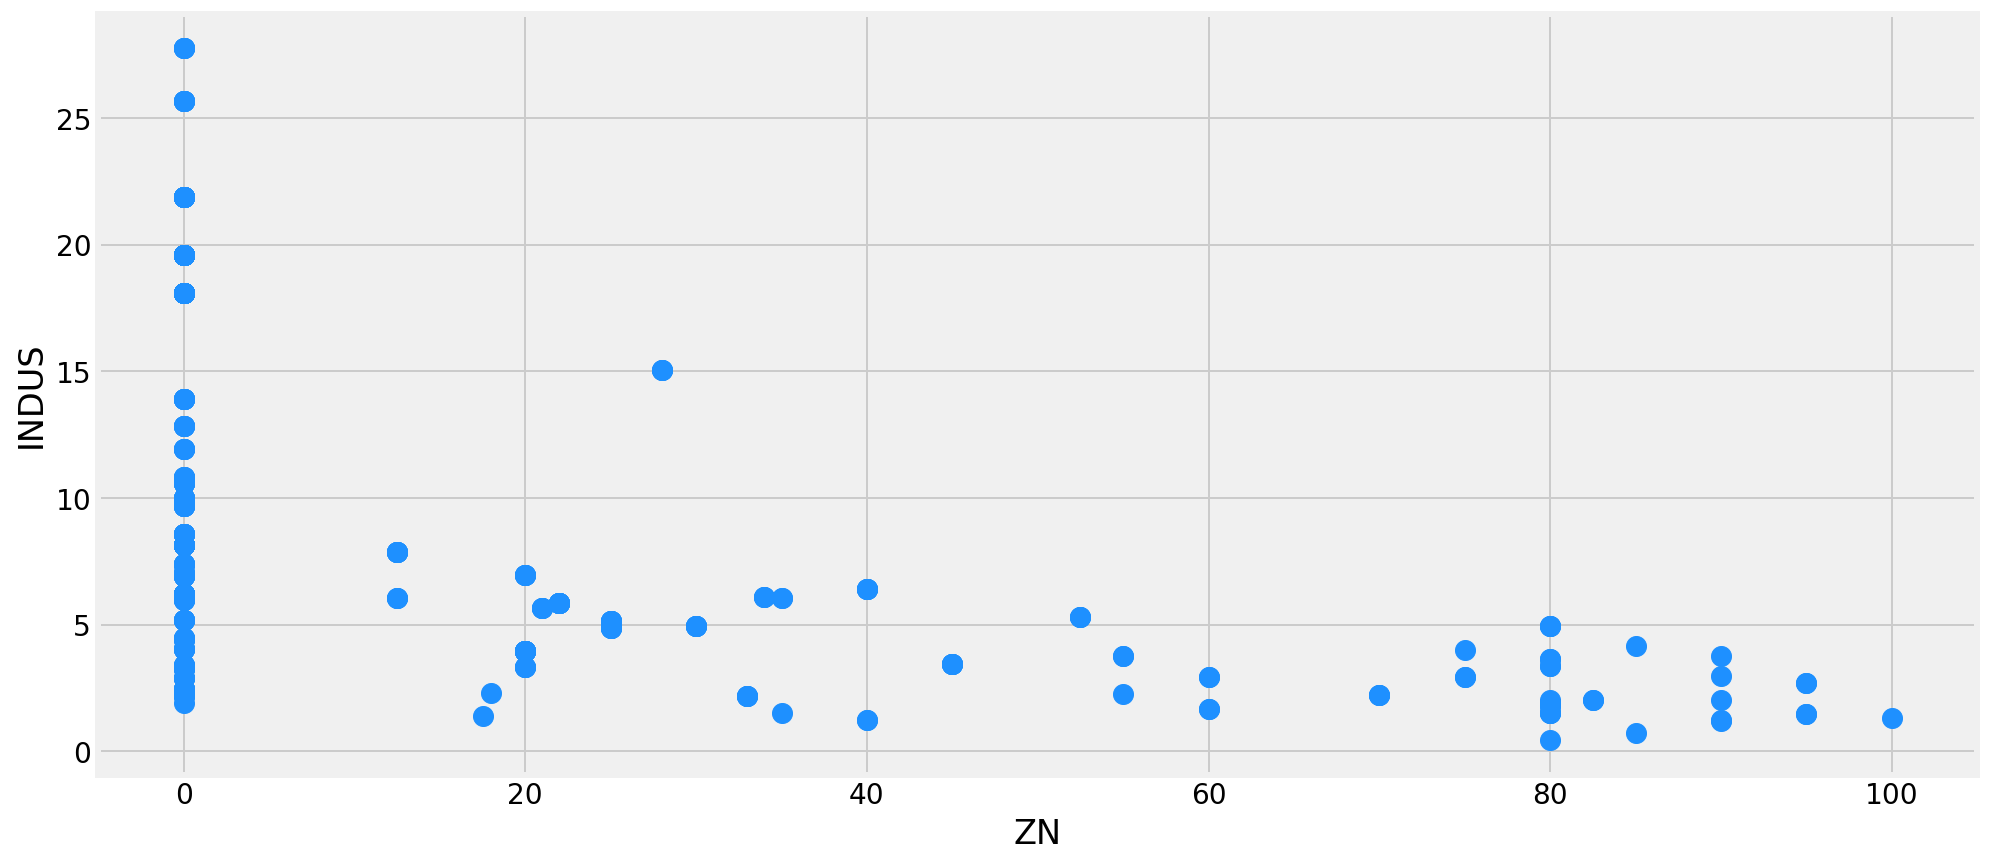

In [126]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

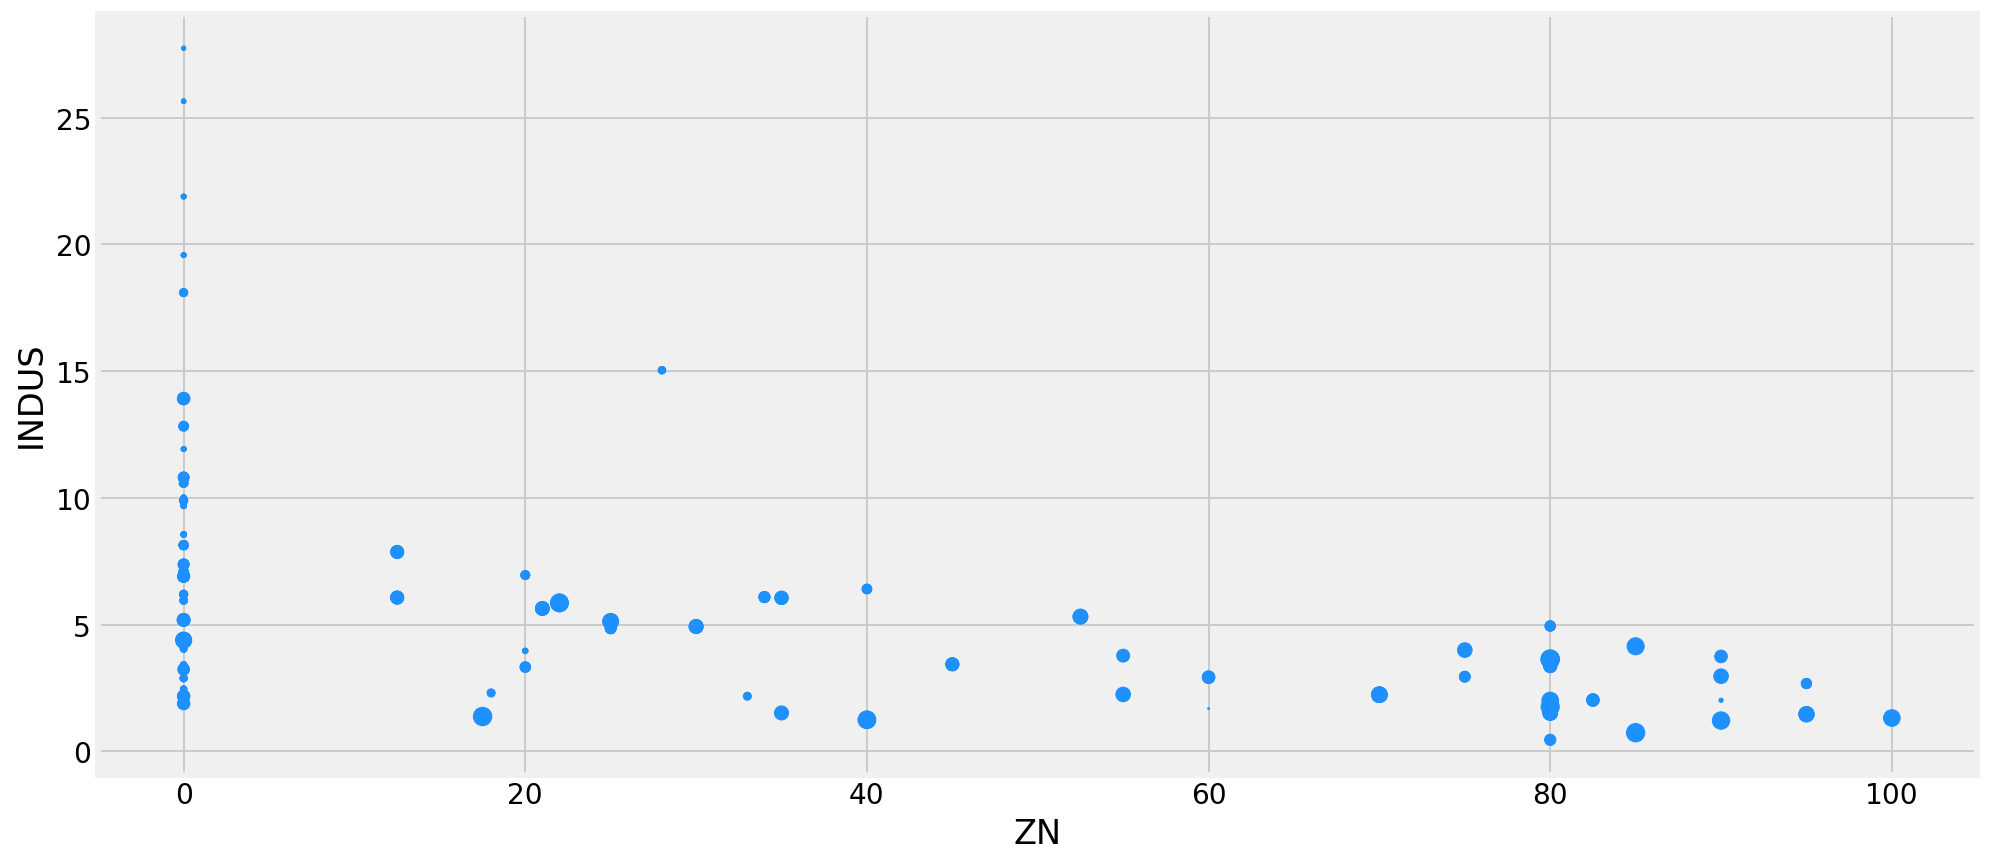

In [134]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
             color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

#larger distance, the further on ZN 

In [ ]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
             color='dodgerblue', figsize=(15,7), s=[x**1.5 for x in housing['DIS']]);

In [128]:
res=[]
for i in range(10):
    res.append(i**2)
    
res



[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [133]:
res= [i**2 for i in range(10) if i is not 4]
res

#i for i in range(10)]
#i is not 4

[0, 1, 4, 9, 25, 36, 49, 64, 81]

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

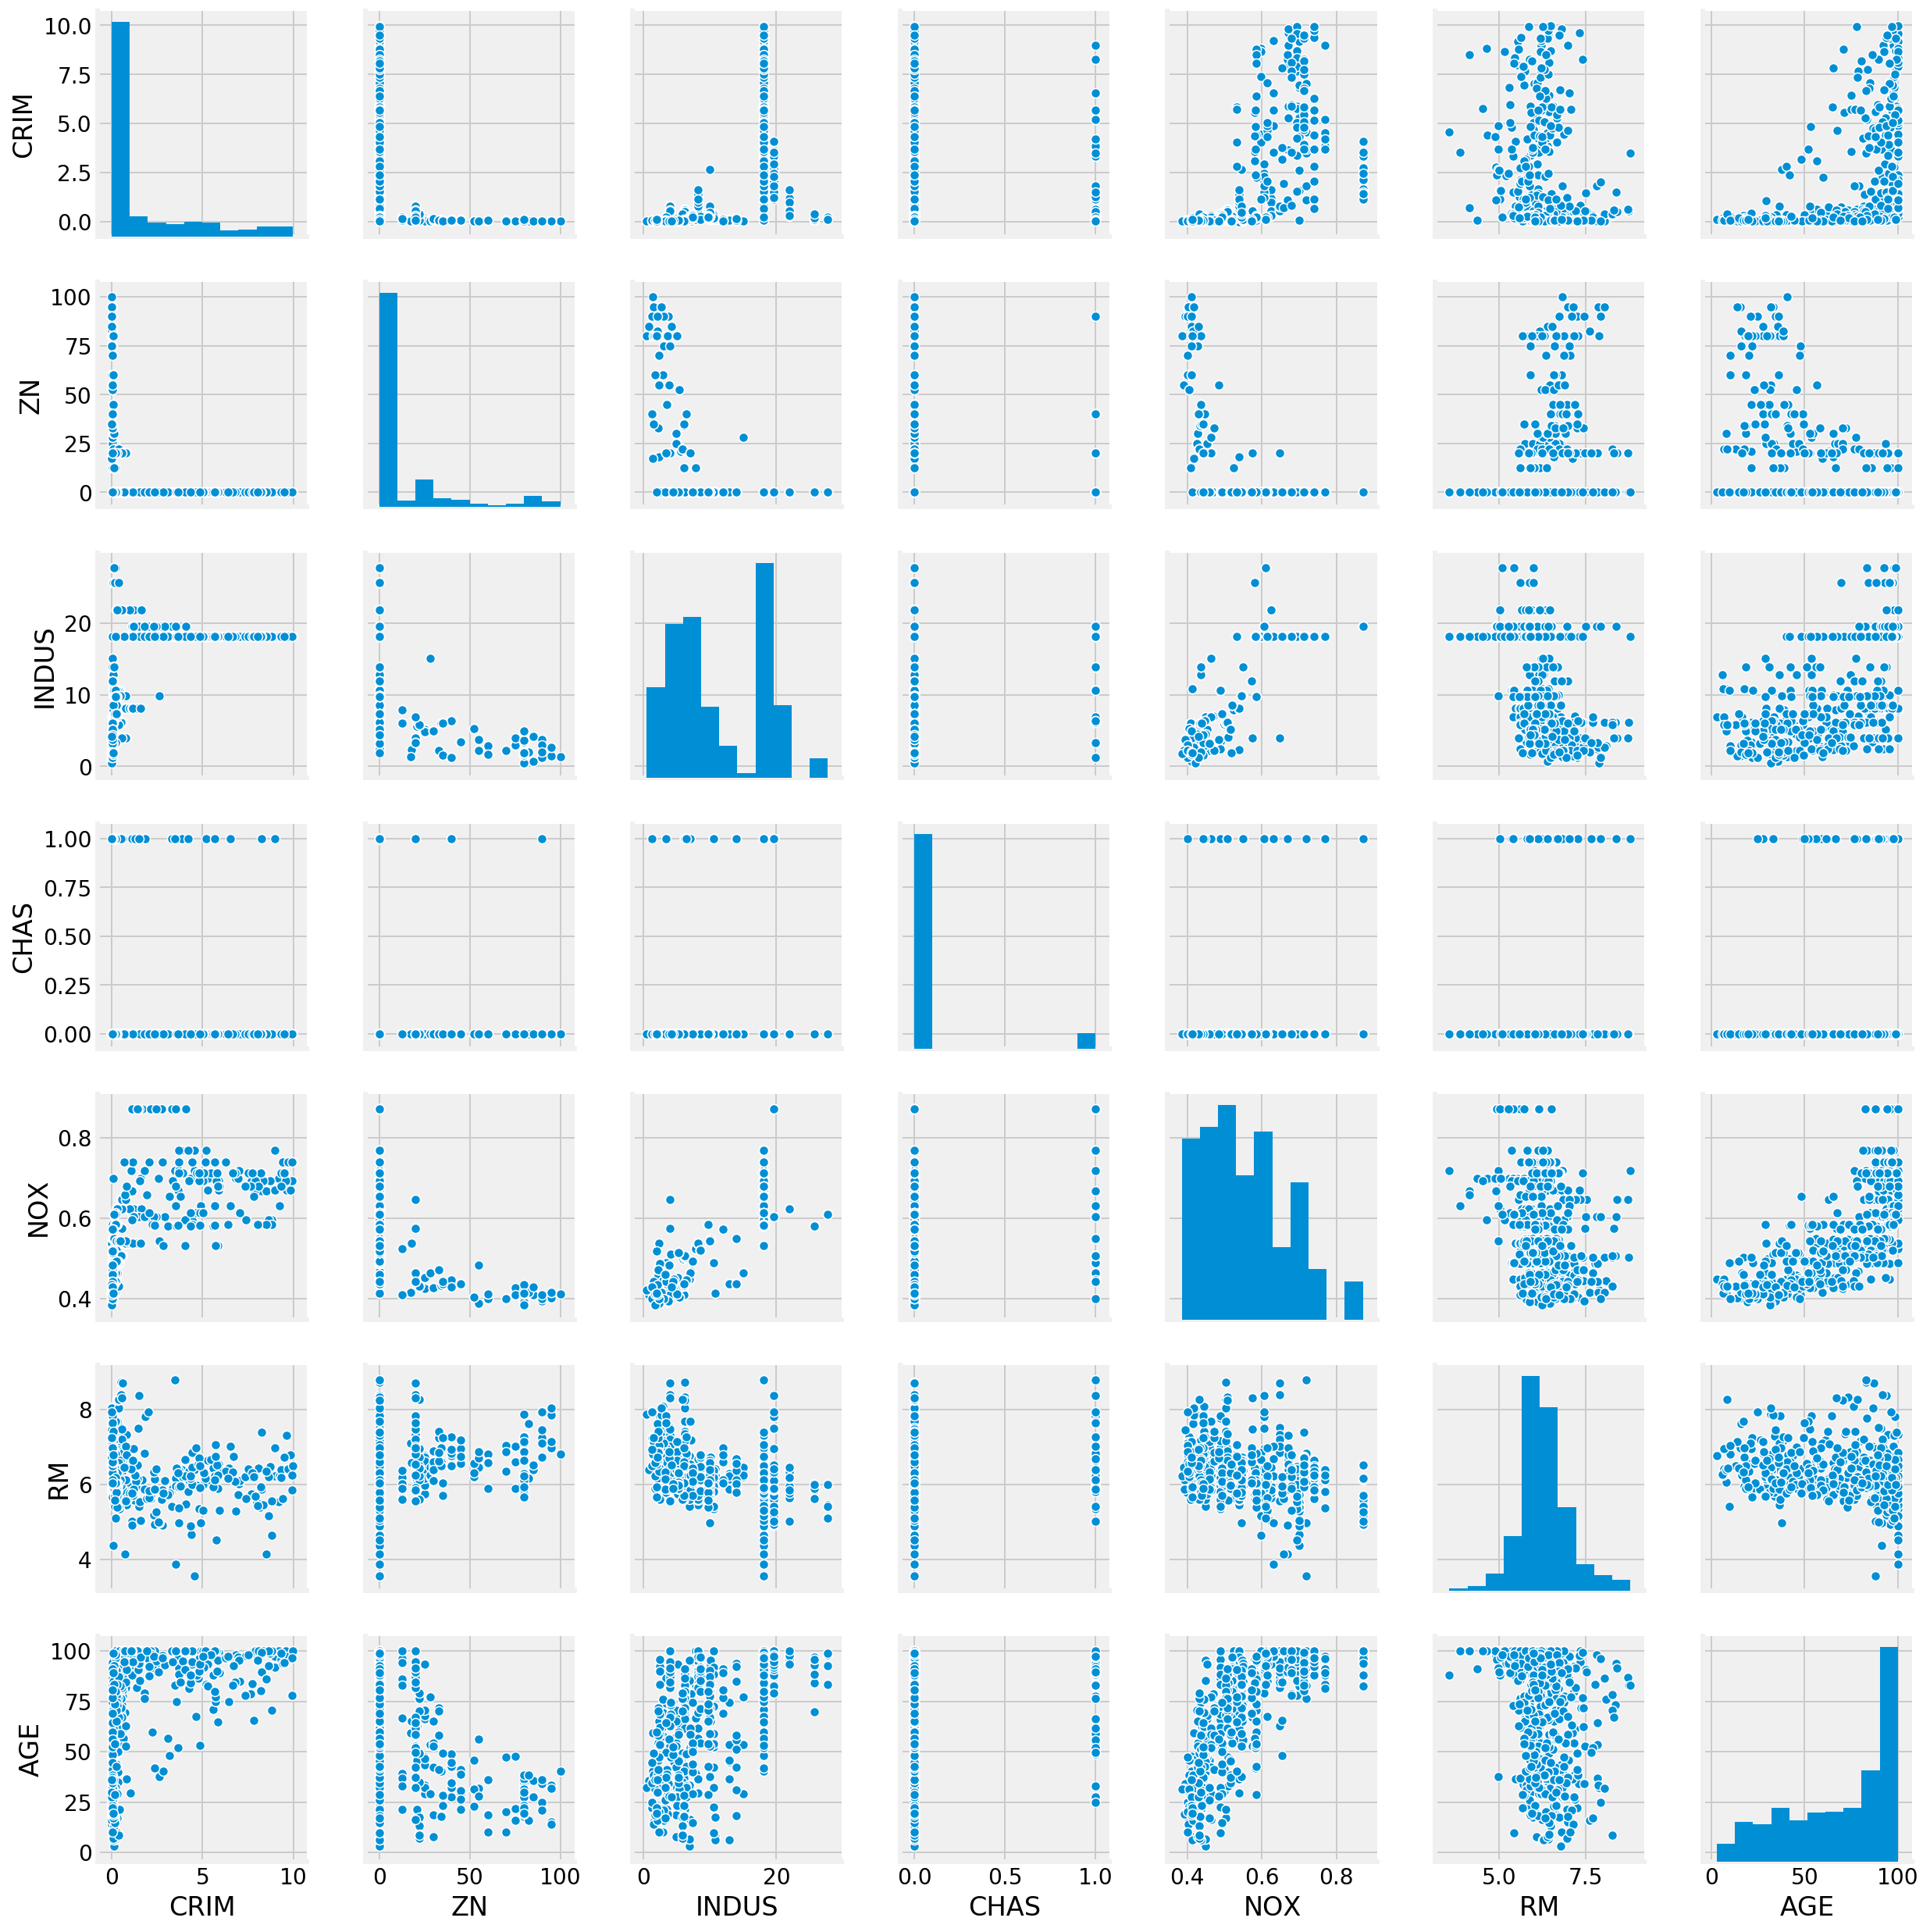

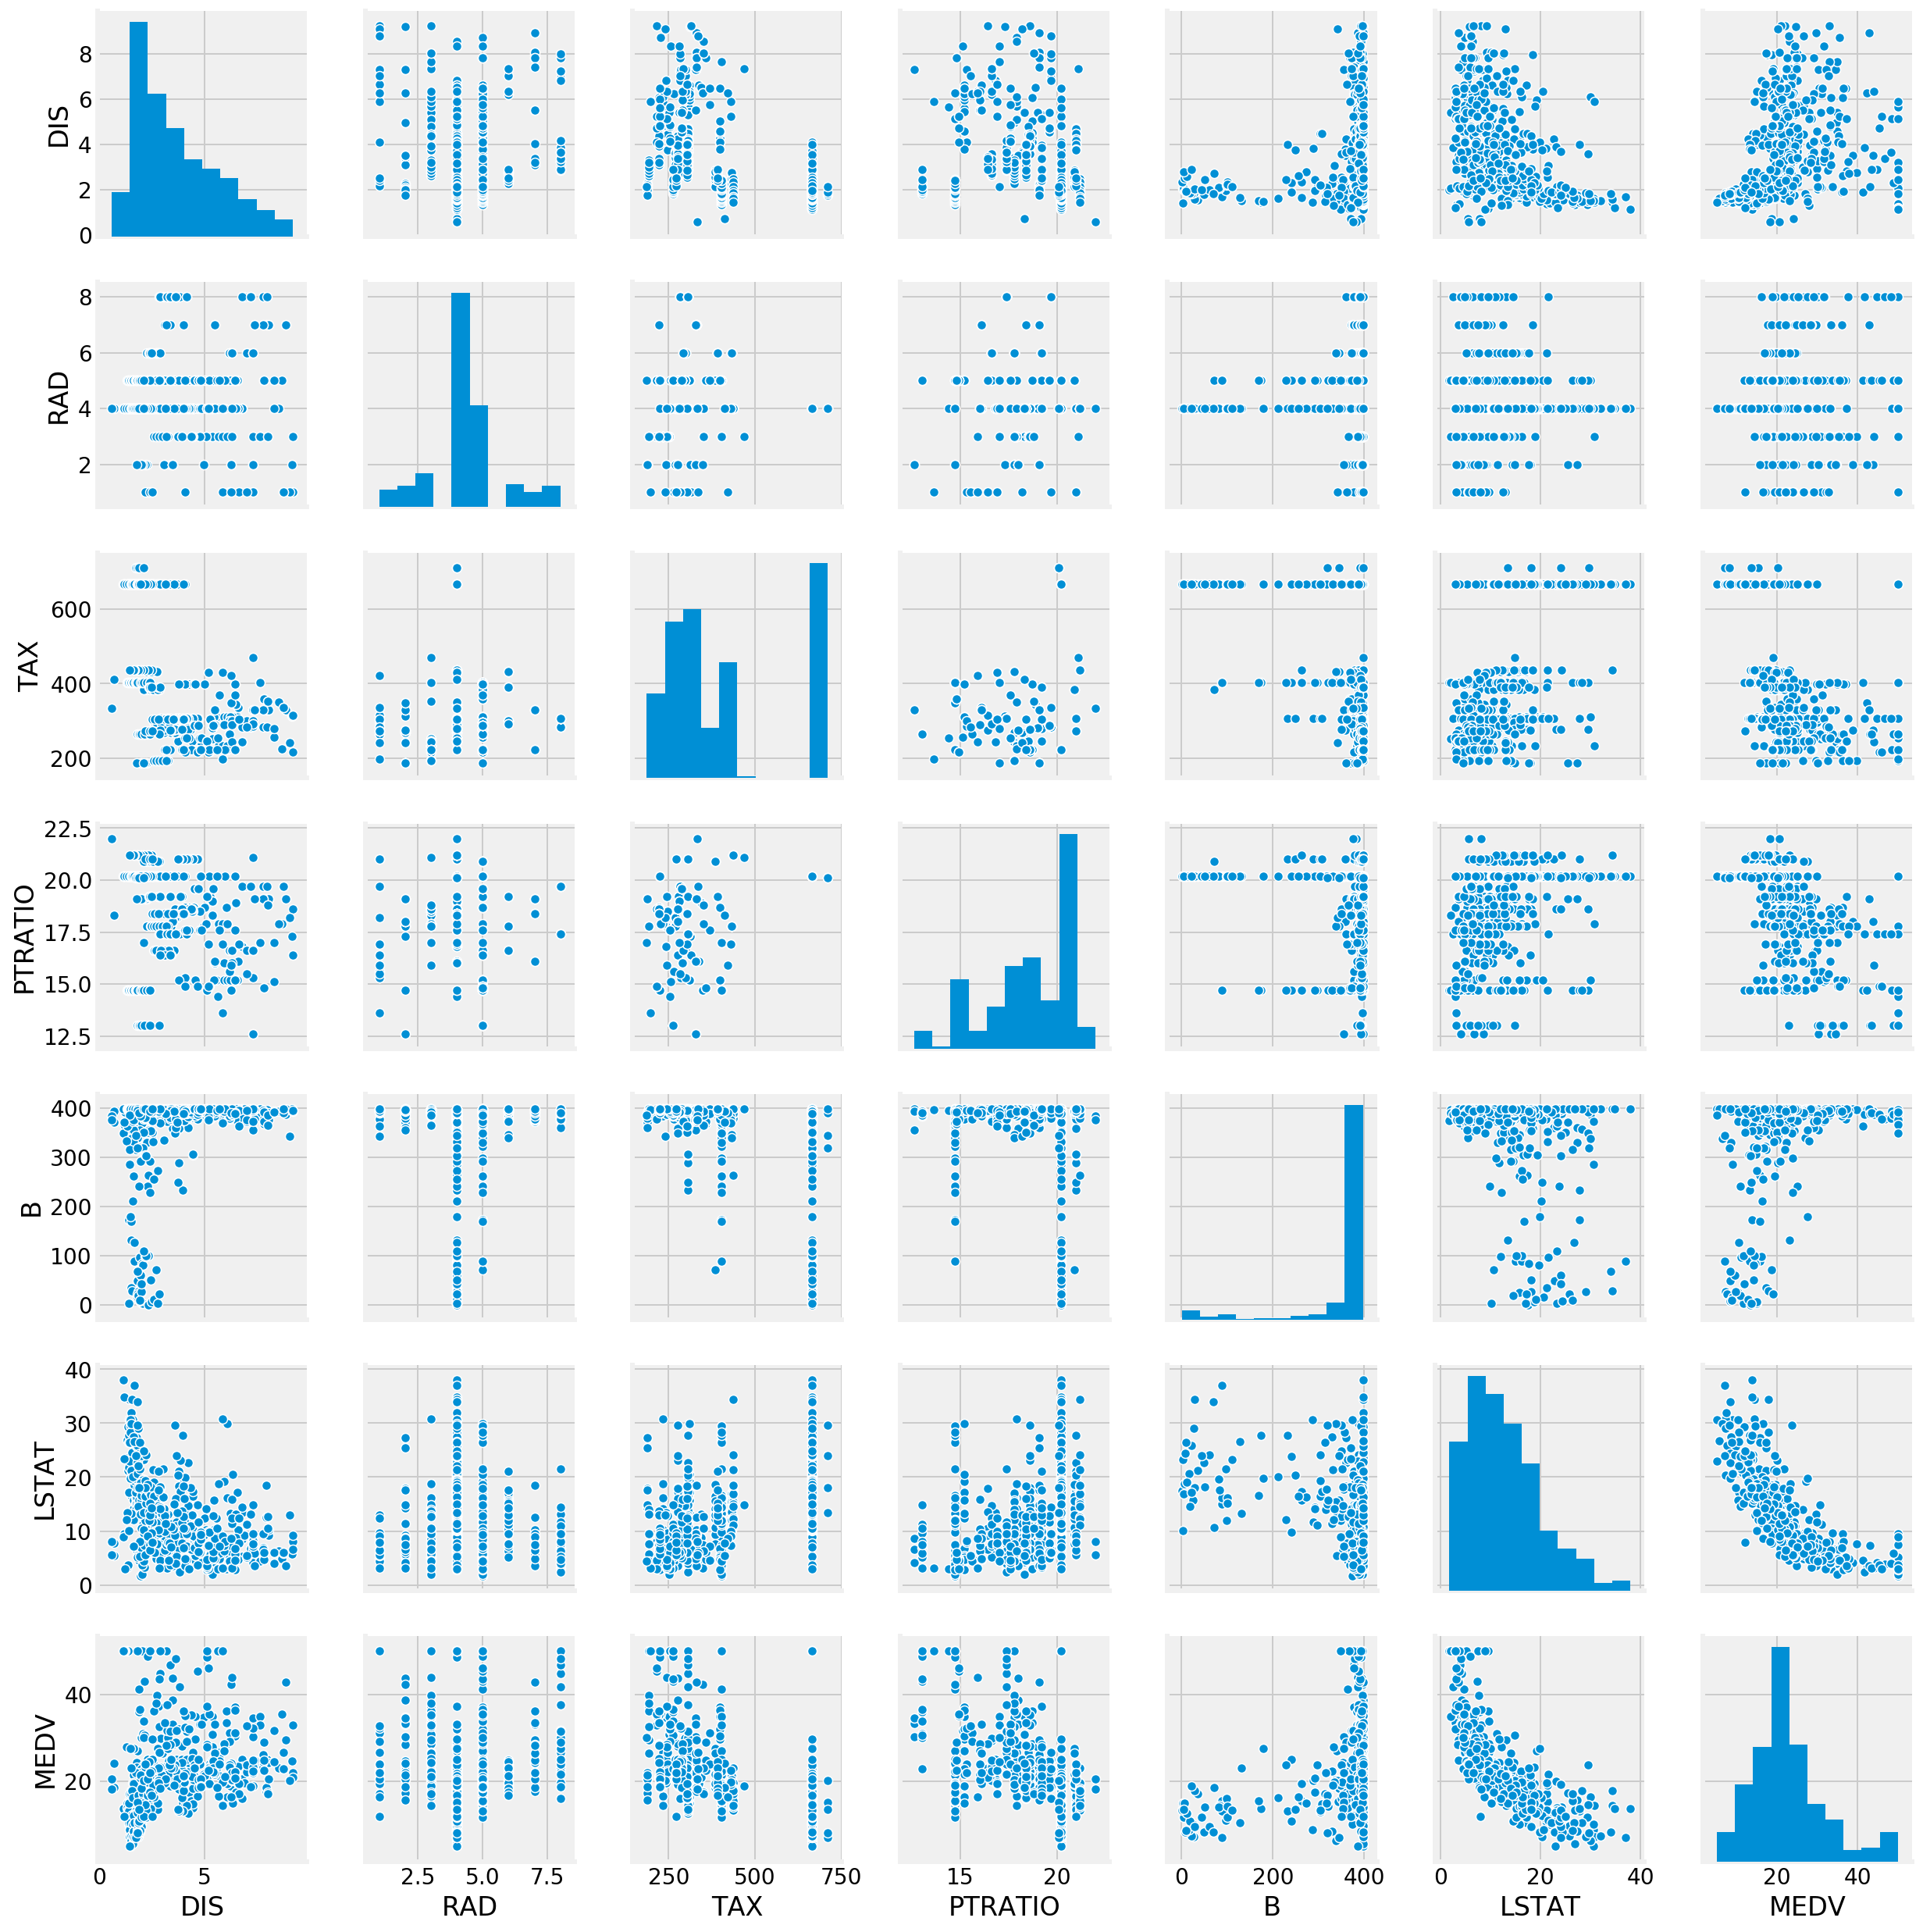

In [135]:
sns.pairplot(housing.iloc[:, 0:7]);
plt.show();

sns.pairplot(housing.iloc[:, 7:housing.shape[1]]);
plt.show();

#very slow for housing all data, choose number to seperate, pick number easy to read 
#2 feature, represent same thing, don't wanna it. model will think twice more important

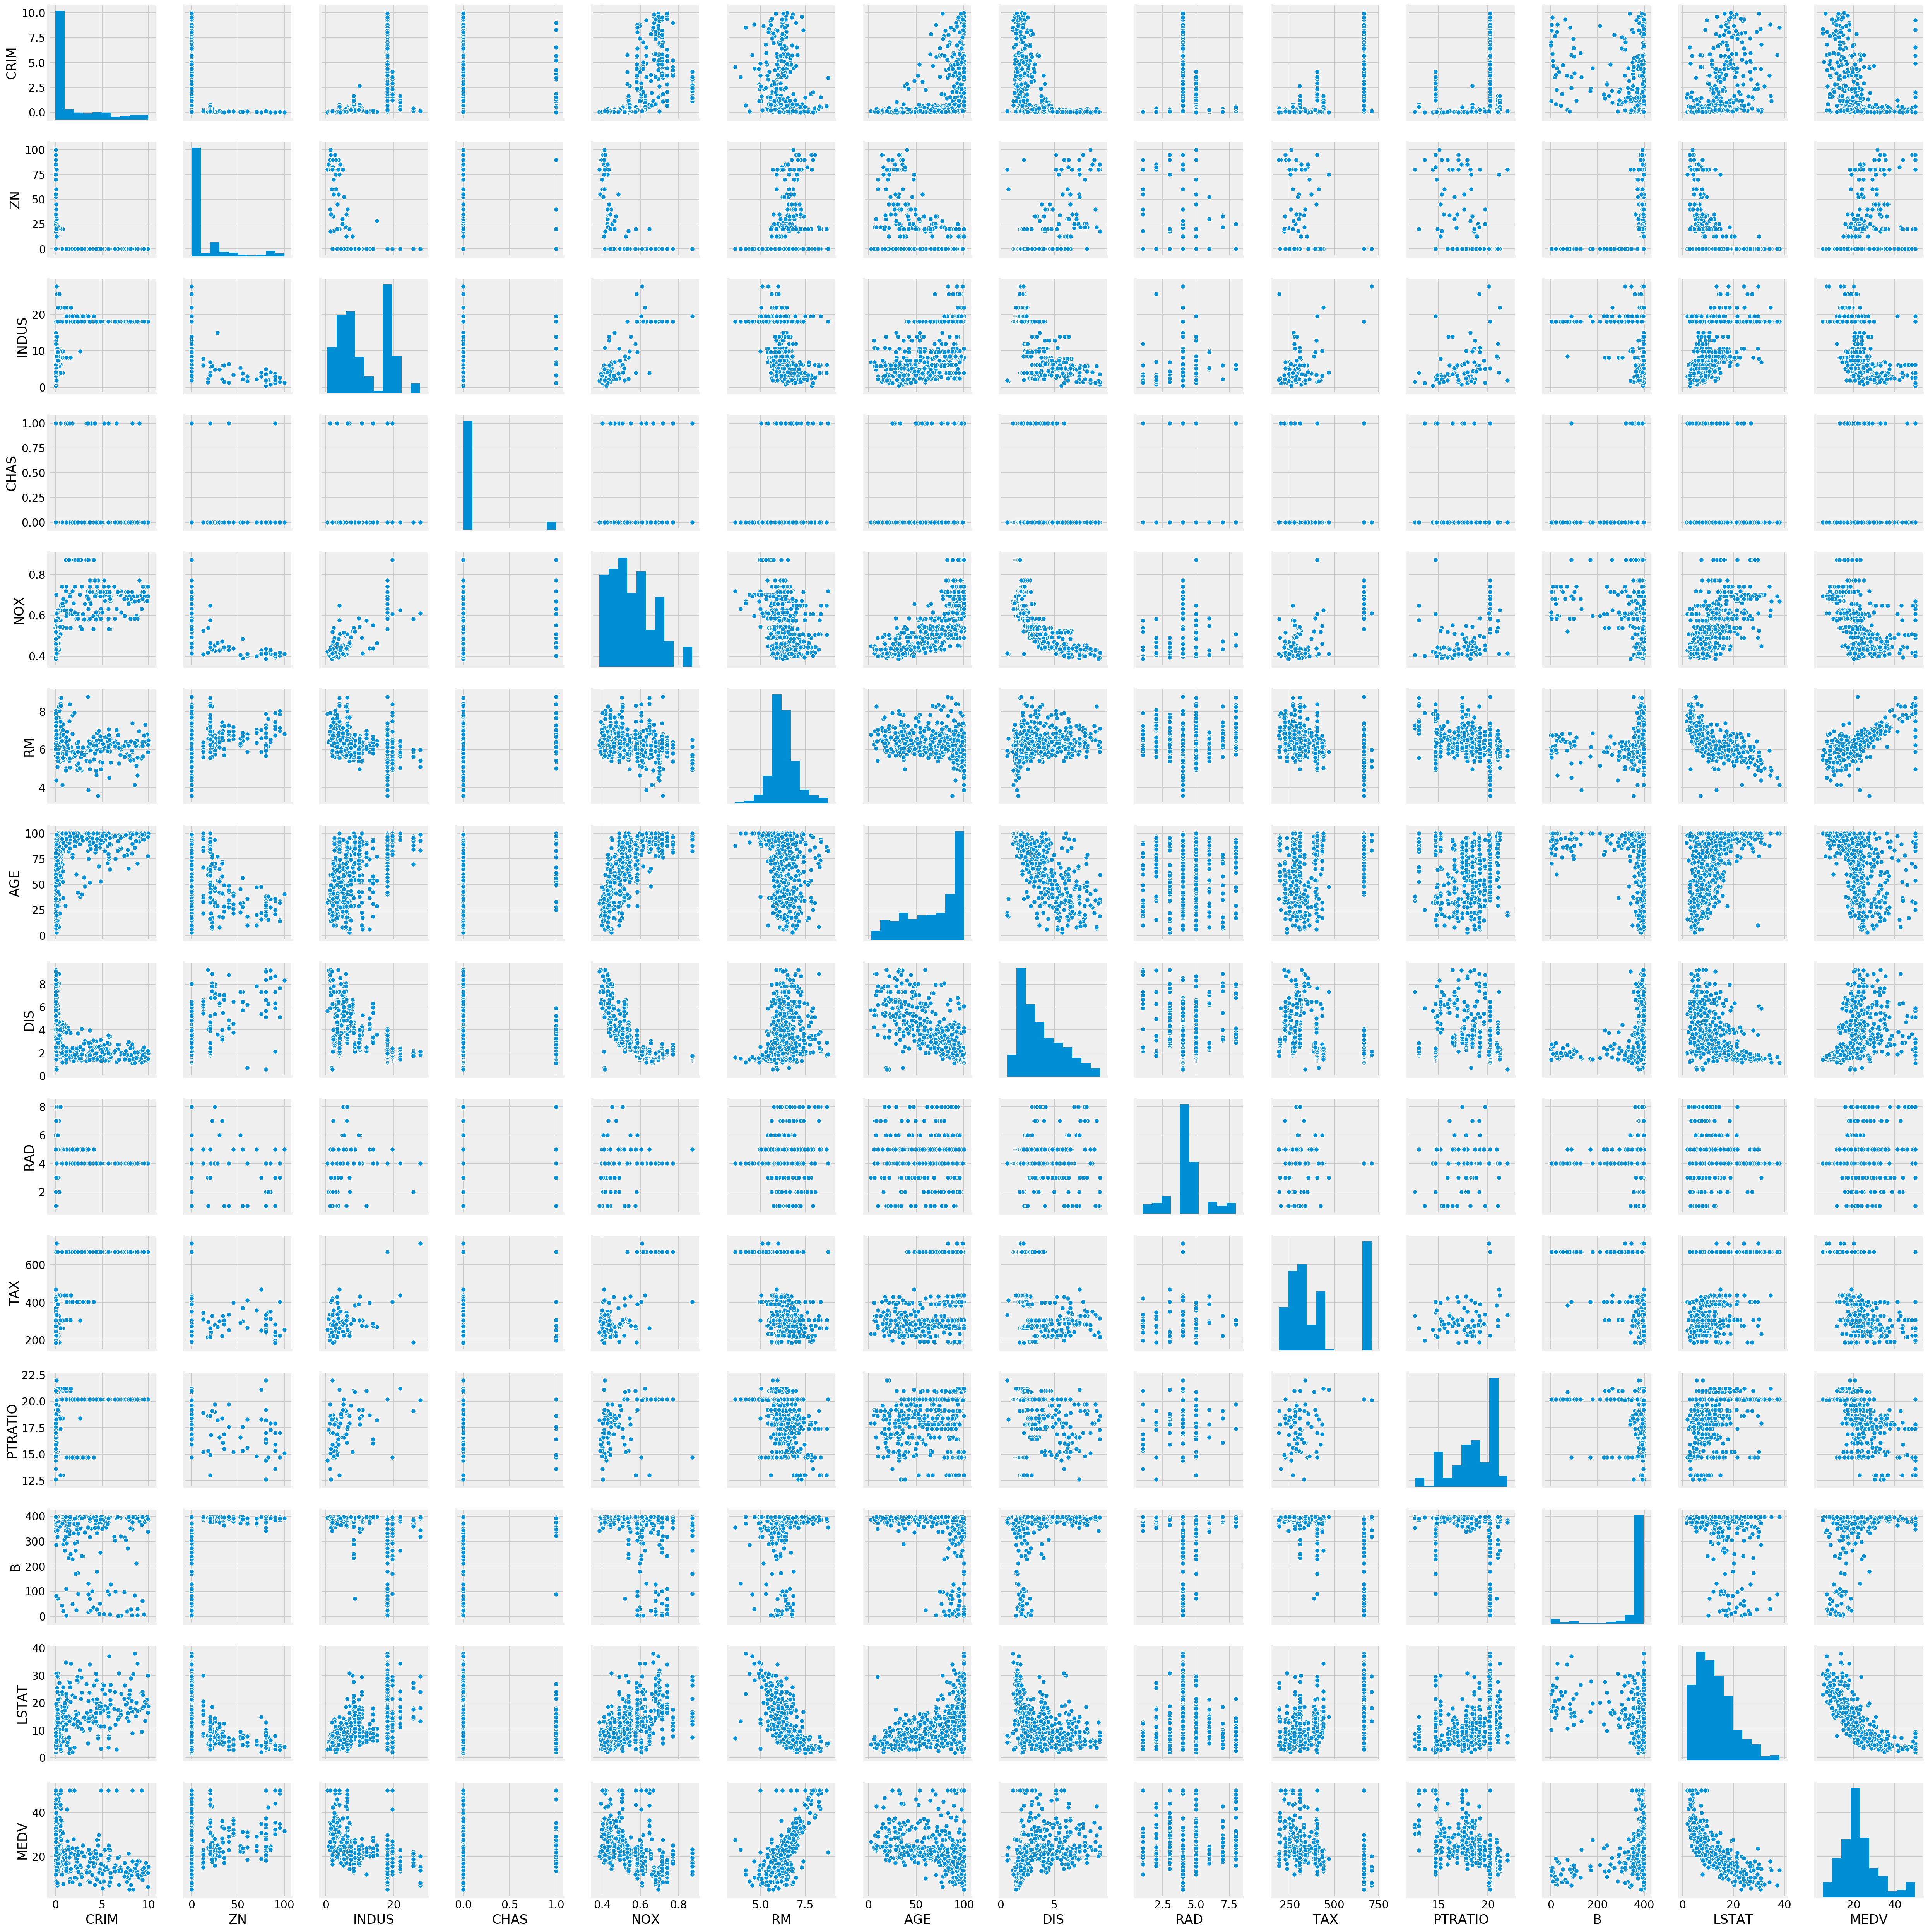

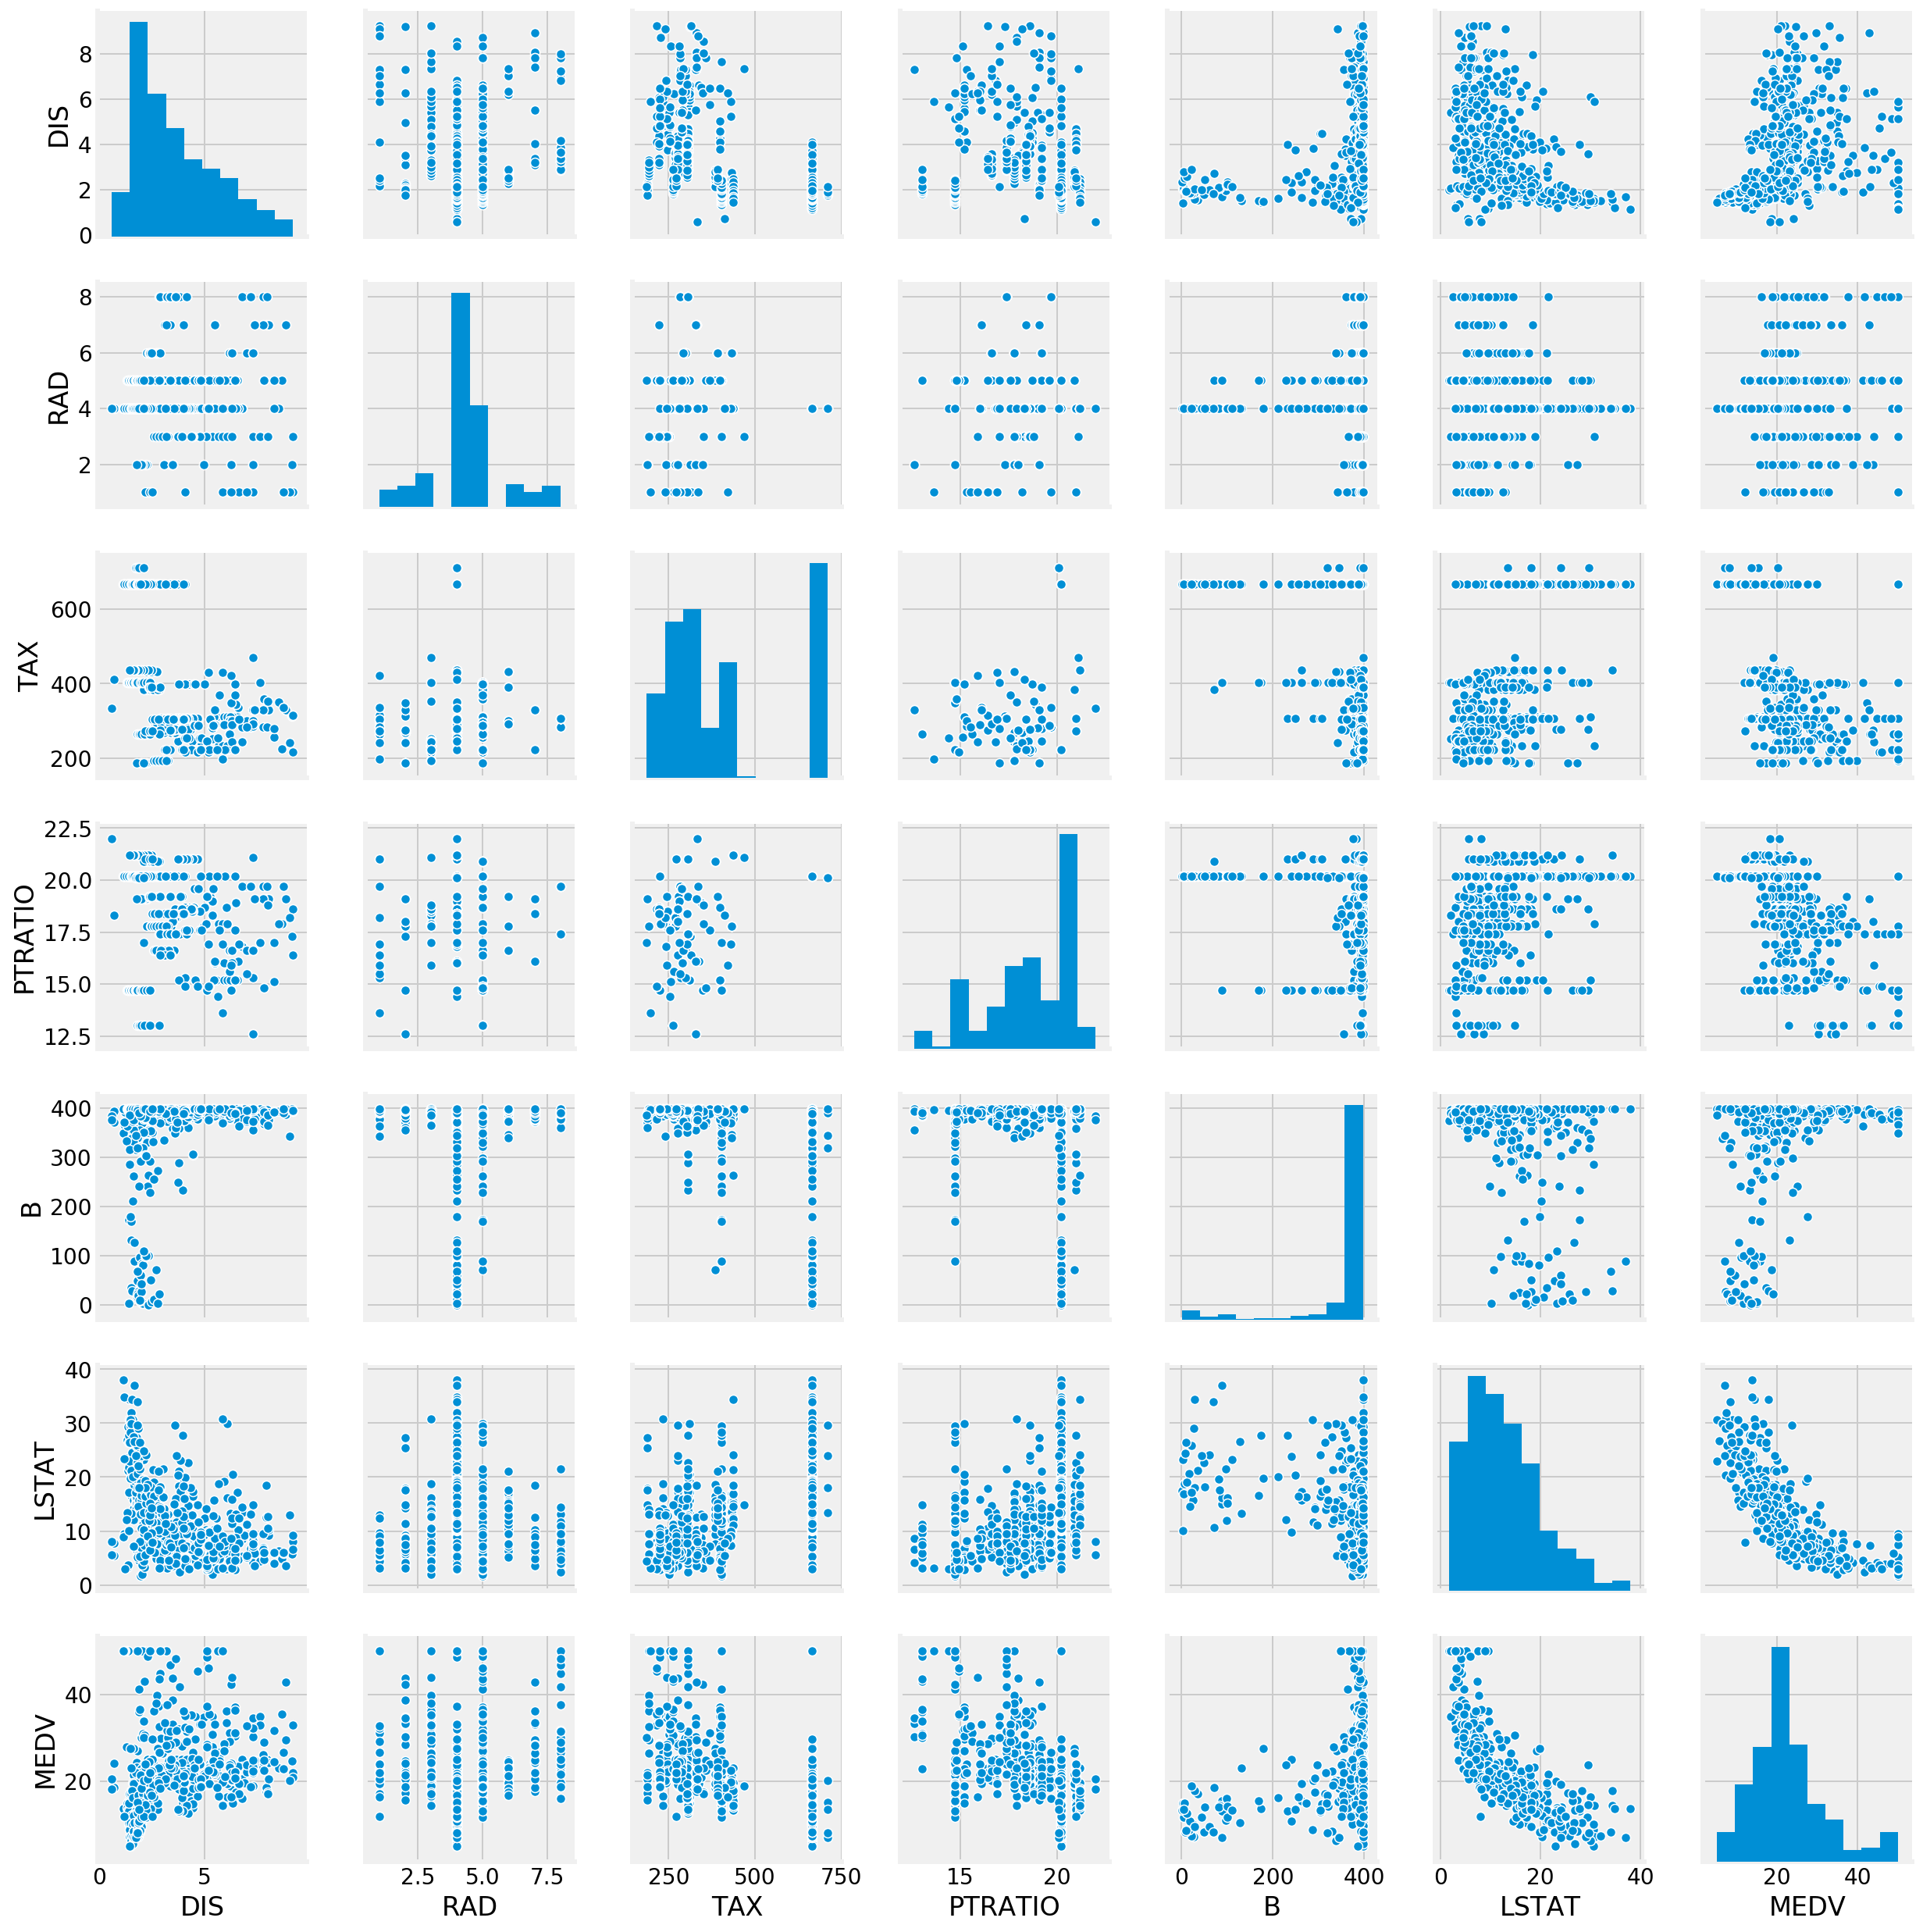

In [136]:
sns.pairplot(housing);
plt.show();

sns.pairplot(housing.iloc[:, 7:housing.shape[1]]);
plt.show();

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

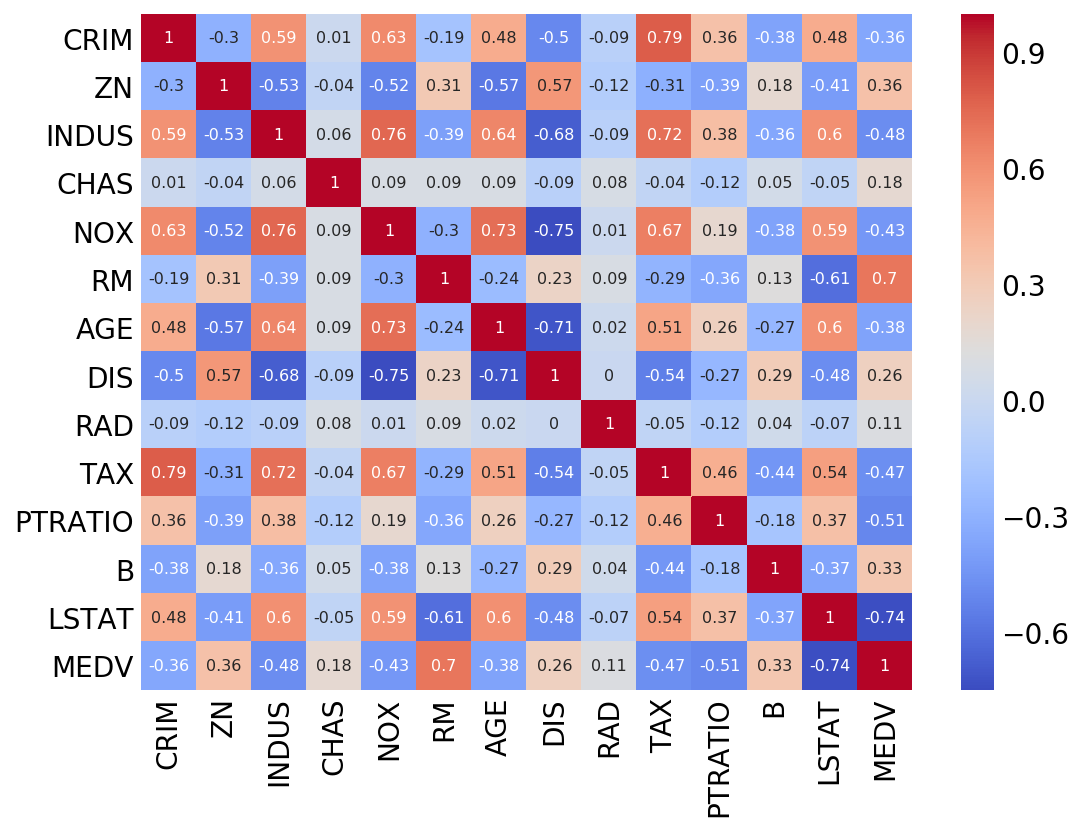

In [137]:
# Make a heatmap on the correlations between variables in the housing data:
sns.heatmap(data=housing.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

#choose some have strong relationship, but don't wanna include together 

### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

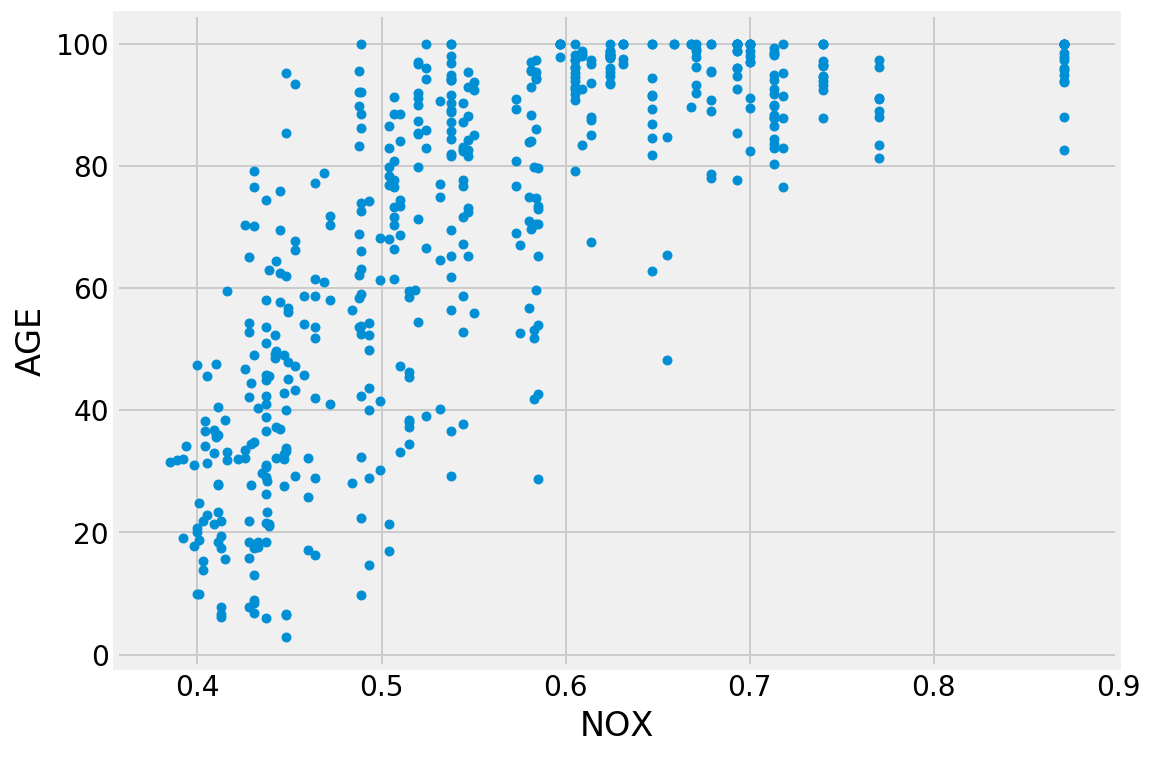

In [138]:
housing[['NOX','AGE']].plot(kind='scatter', x='NOX', y='AGE');

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

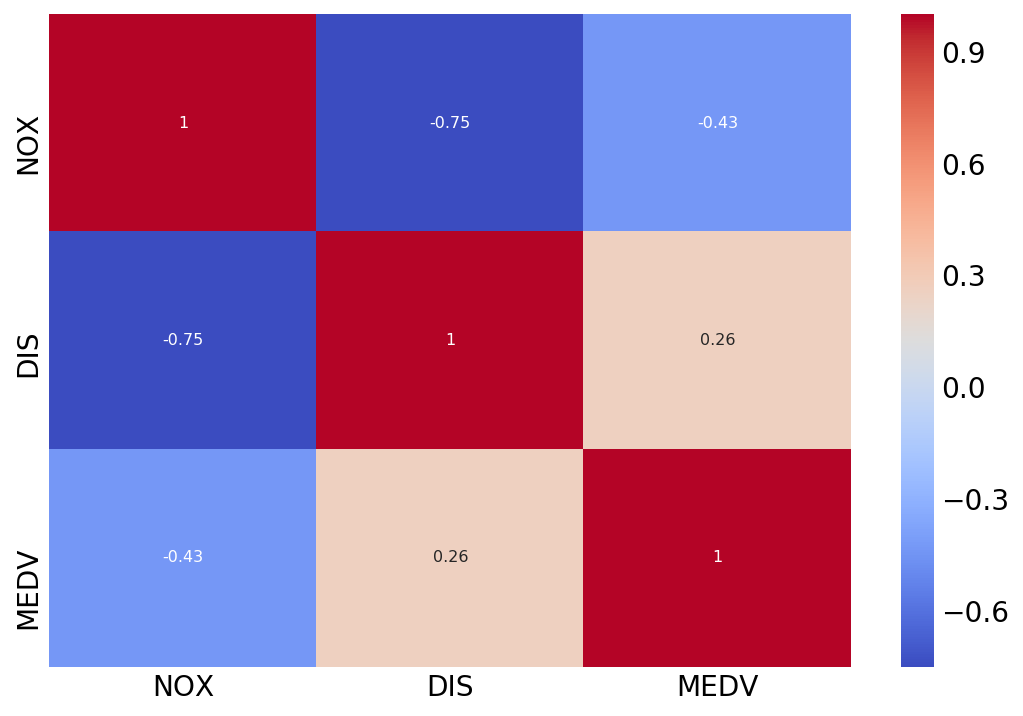

In [139]:
sns.heatmap(data=housing[['NOX','DIS','MEDV']].corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})



<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

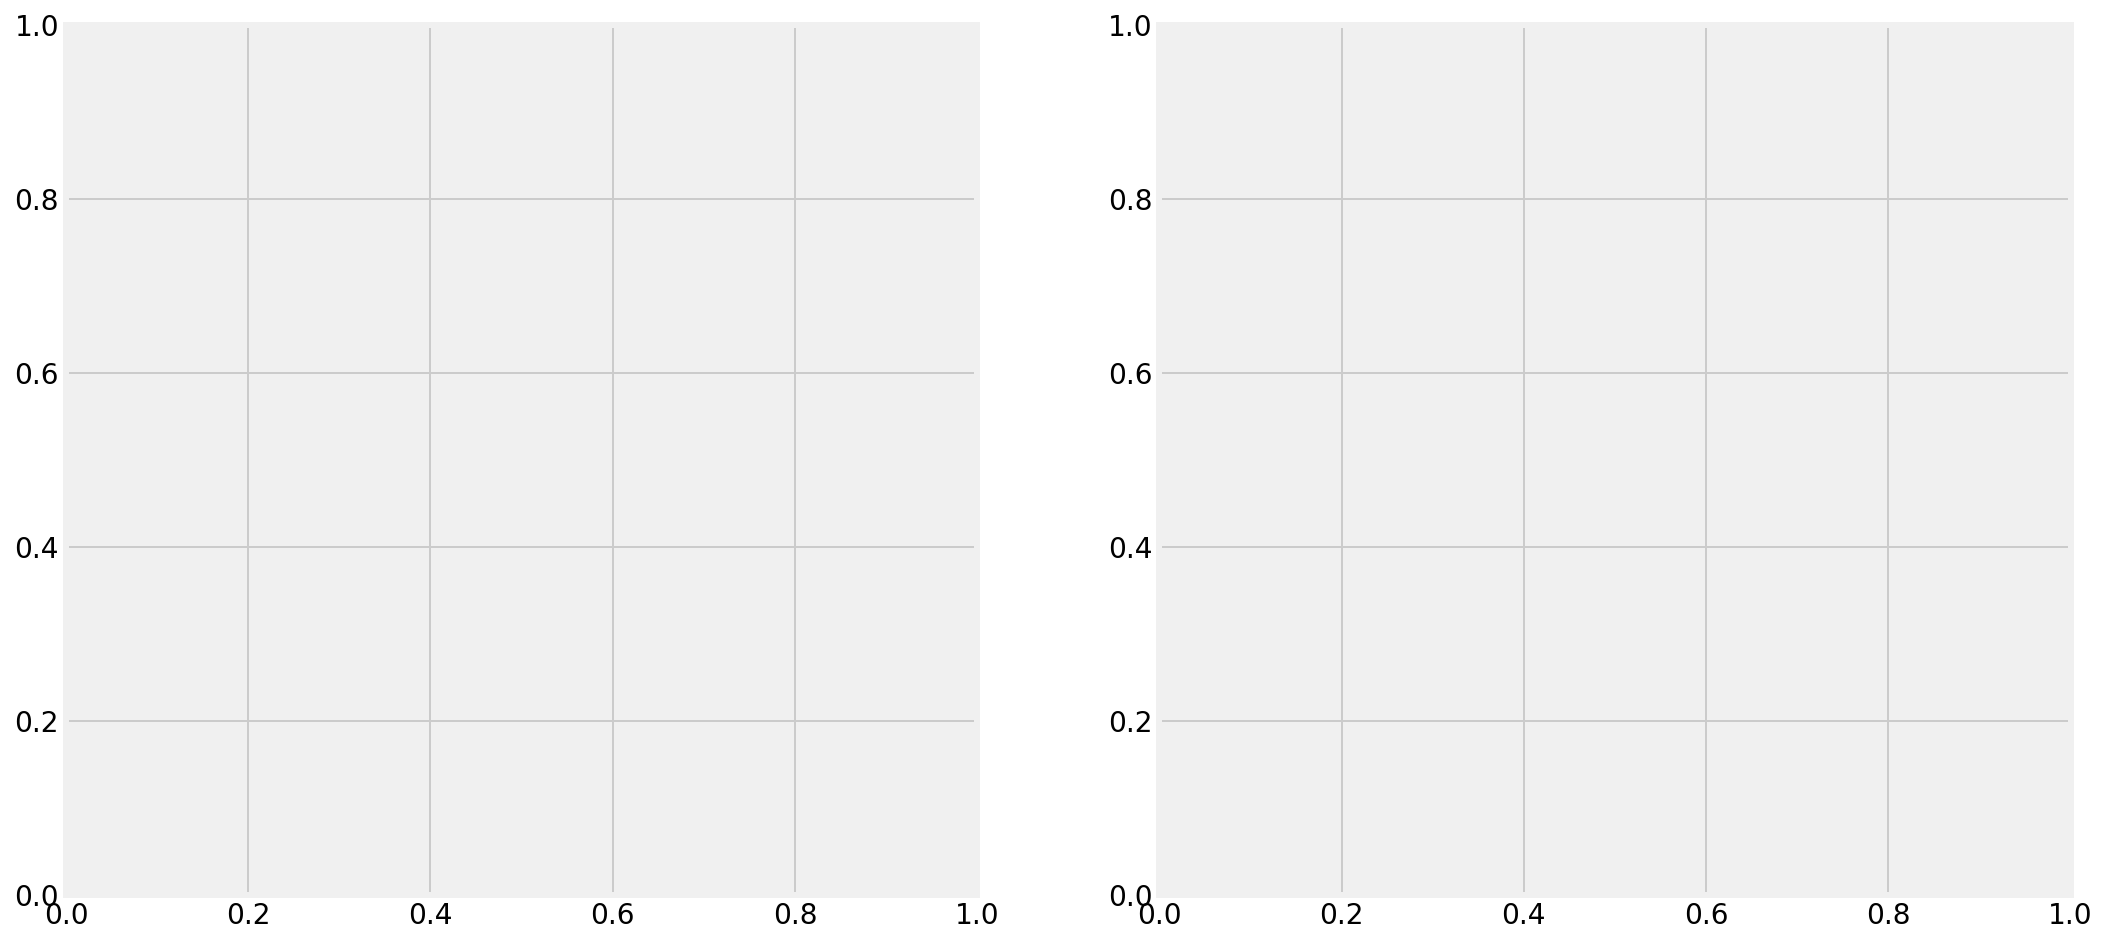

In [141]:
fig, ax = plt.subplots(1,2, figsize=(16,8));

#can make 2 or 1, ax =0, ax=1. short hand for x 

Within this canvas, we can contain smaller objects called axes.

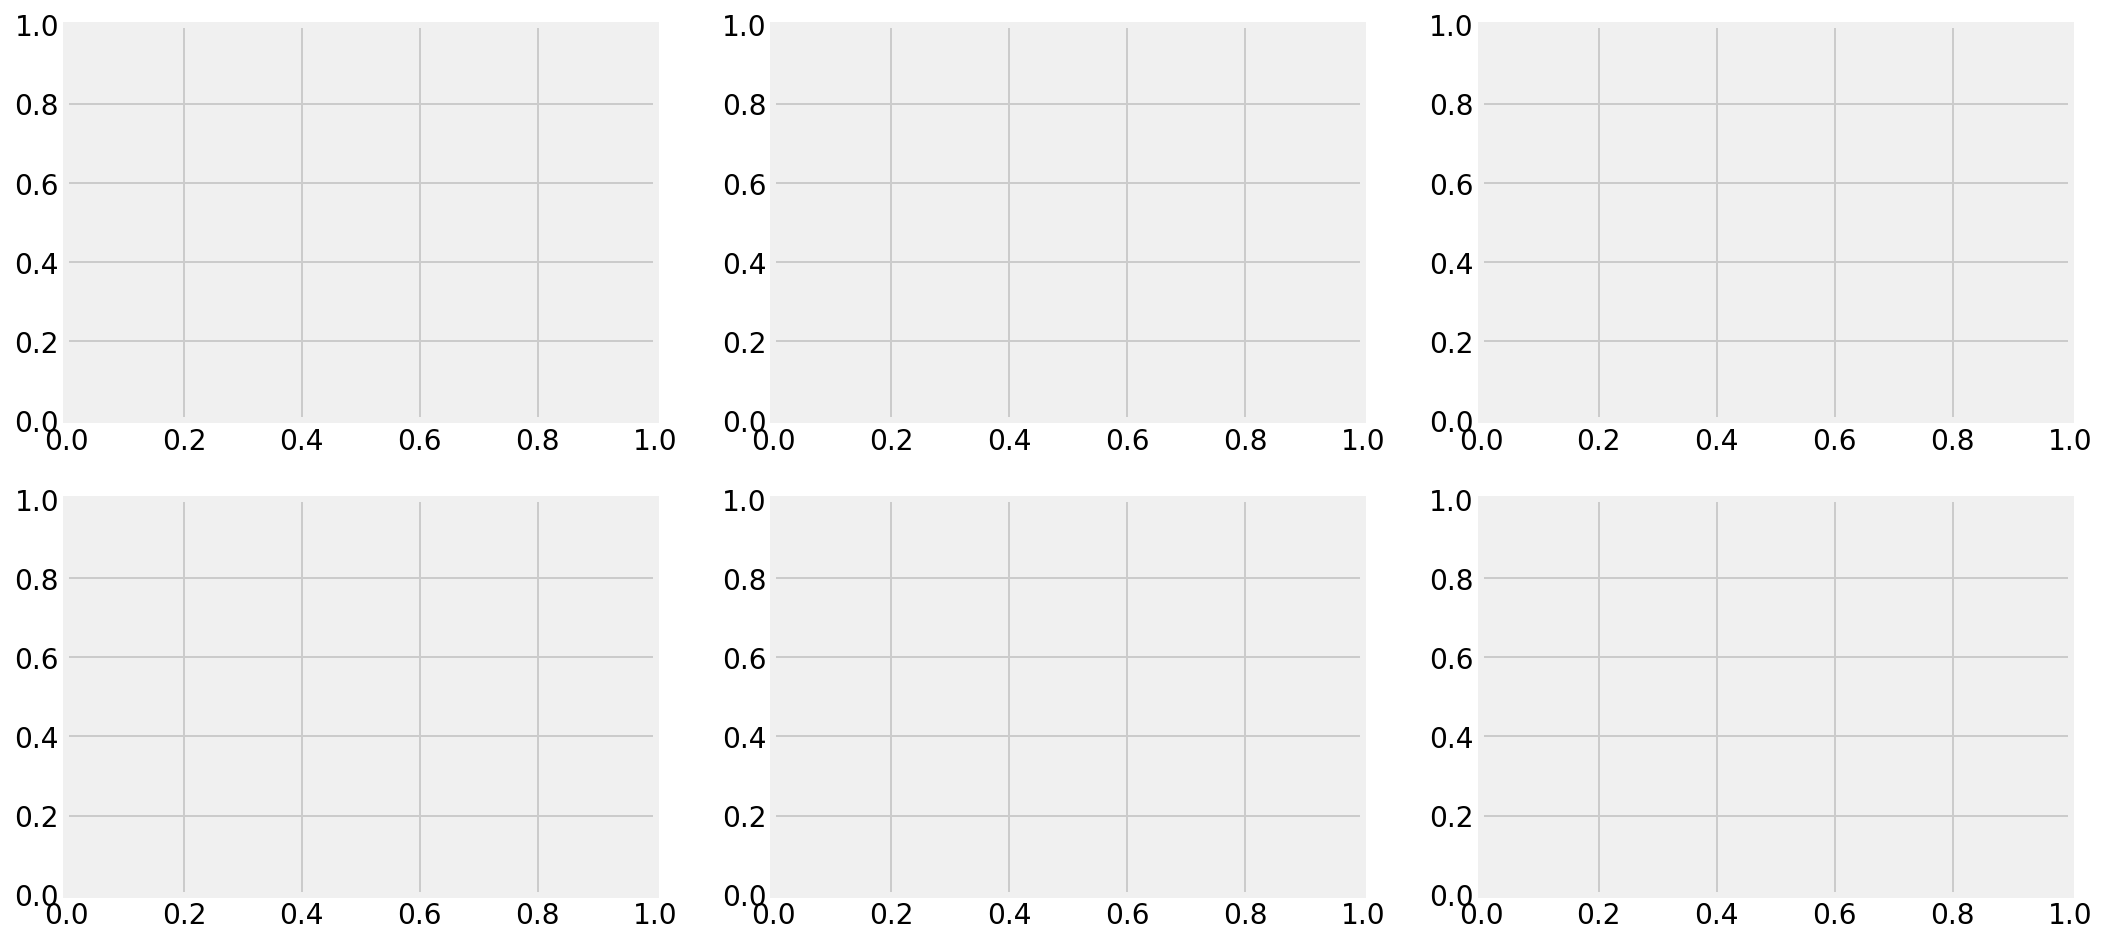

In [142]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

KeyError: 'meaningfull name1'

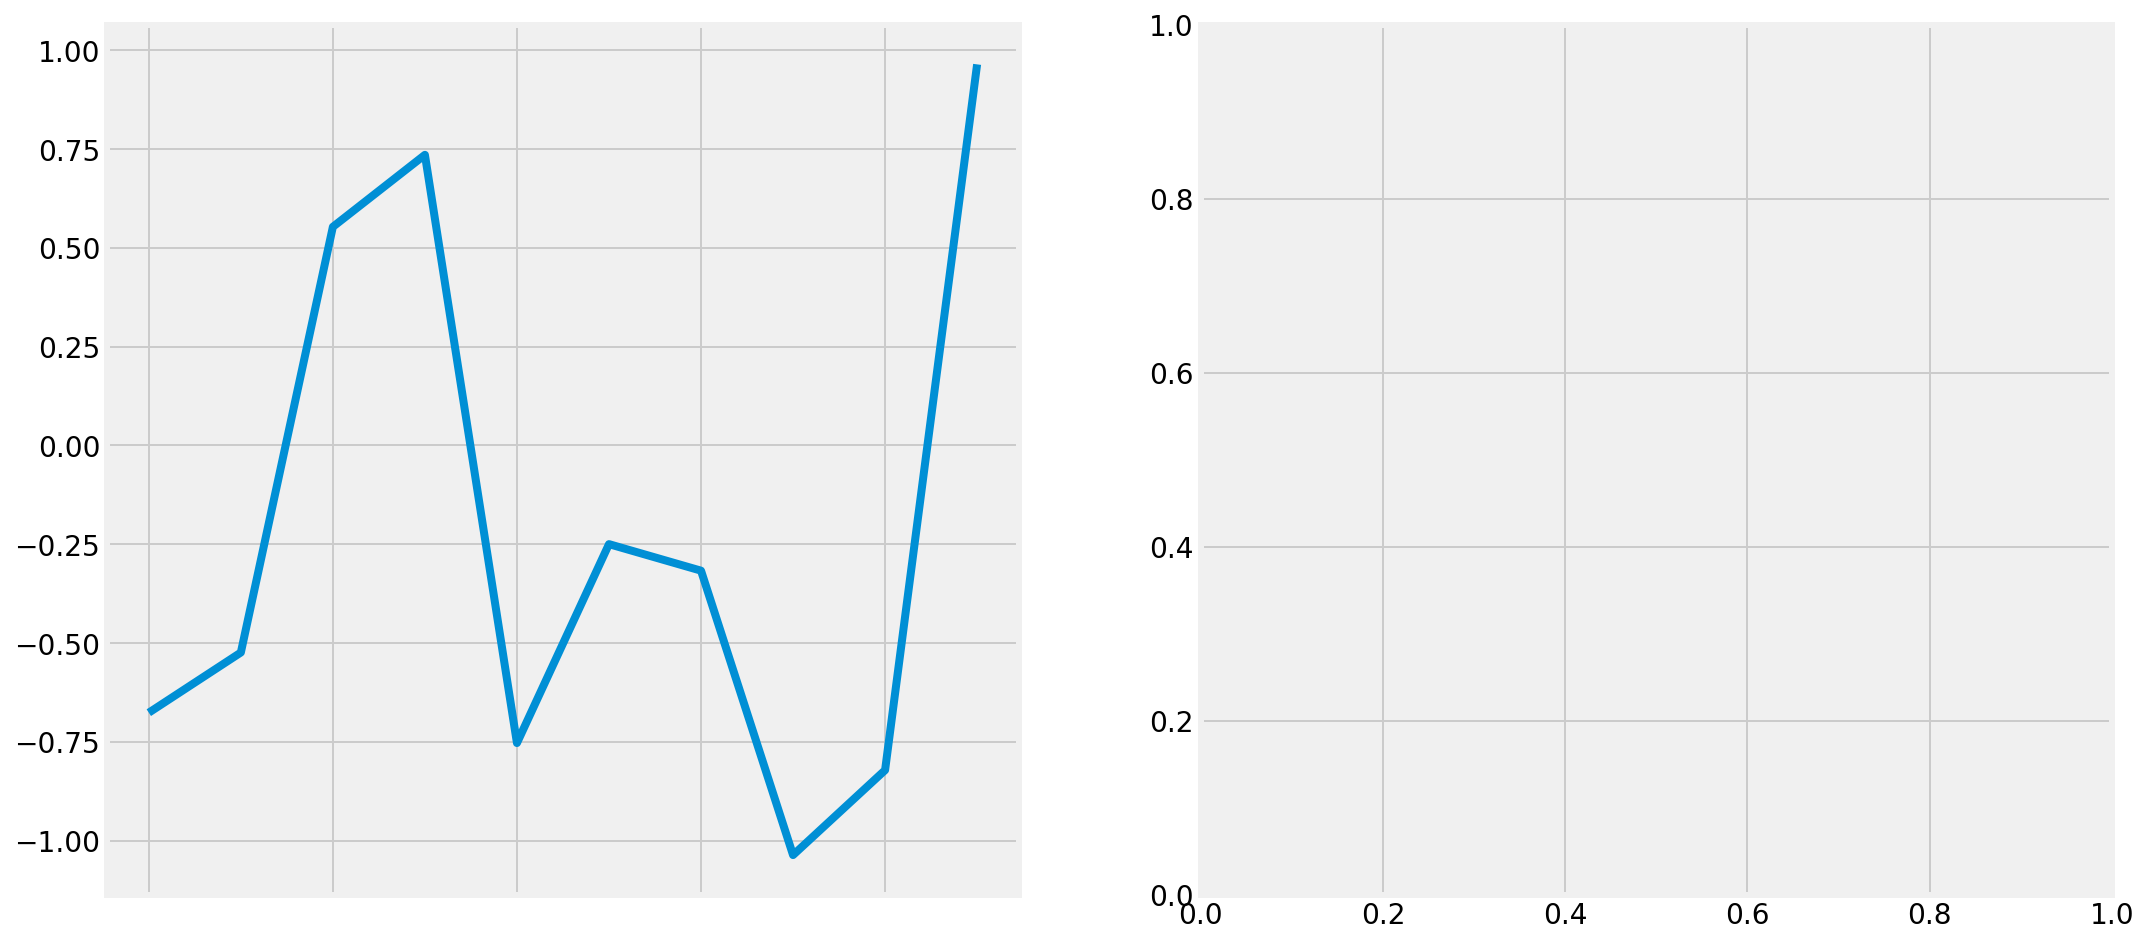

In [144]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
#df.plot(ax=axes[0][0]);
df['meaningfull name'].plot(ax=axes[0]);
df['meaningfull name1'].plot(ax=axes[1]);

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,8))
#df.plot(ax=axes[0][0]);
df['meaningfull name'].plot(ax=axes[0]);
df['meaningfull name1'].plot(ax=axes[1]);

## Let's use a bit more customization.
---

KeyError: 'col2'

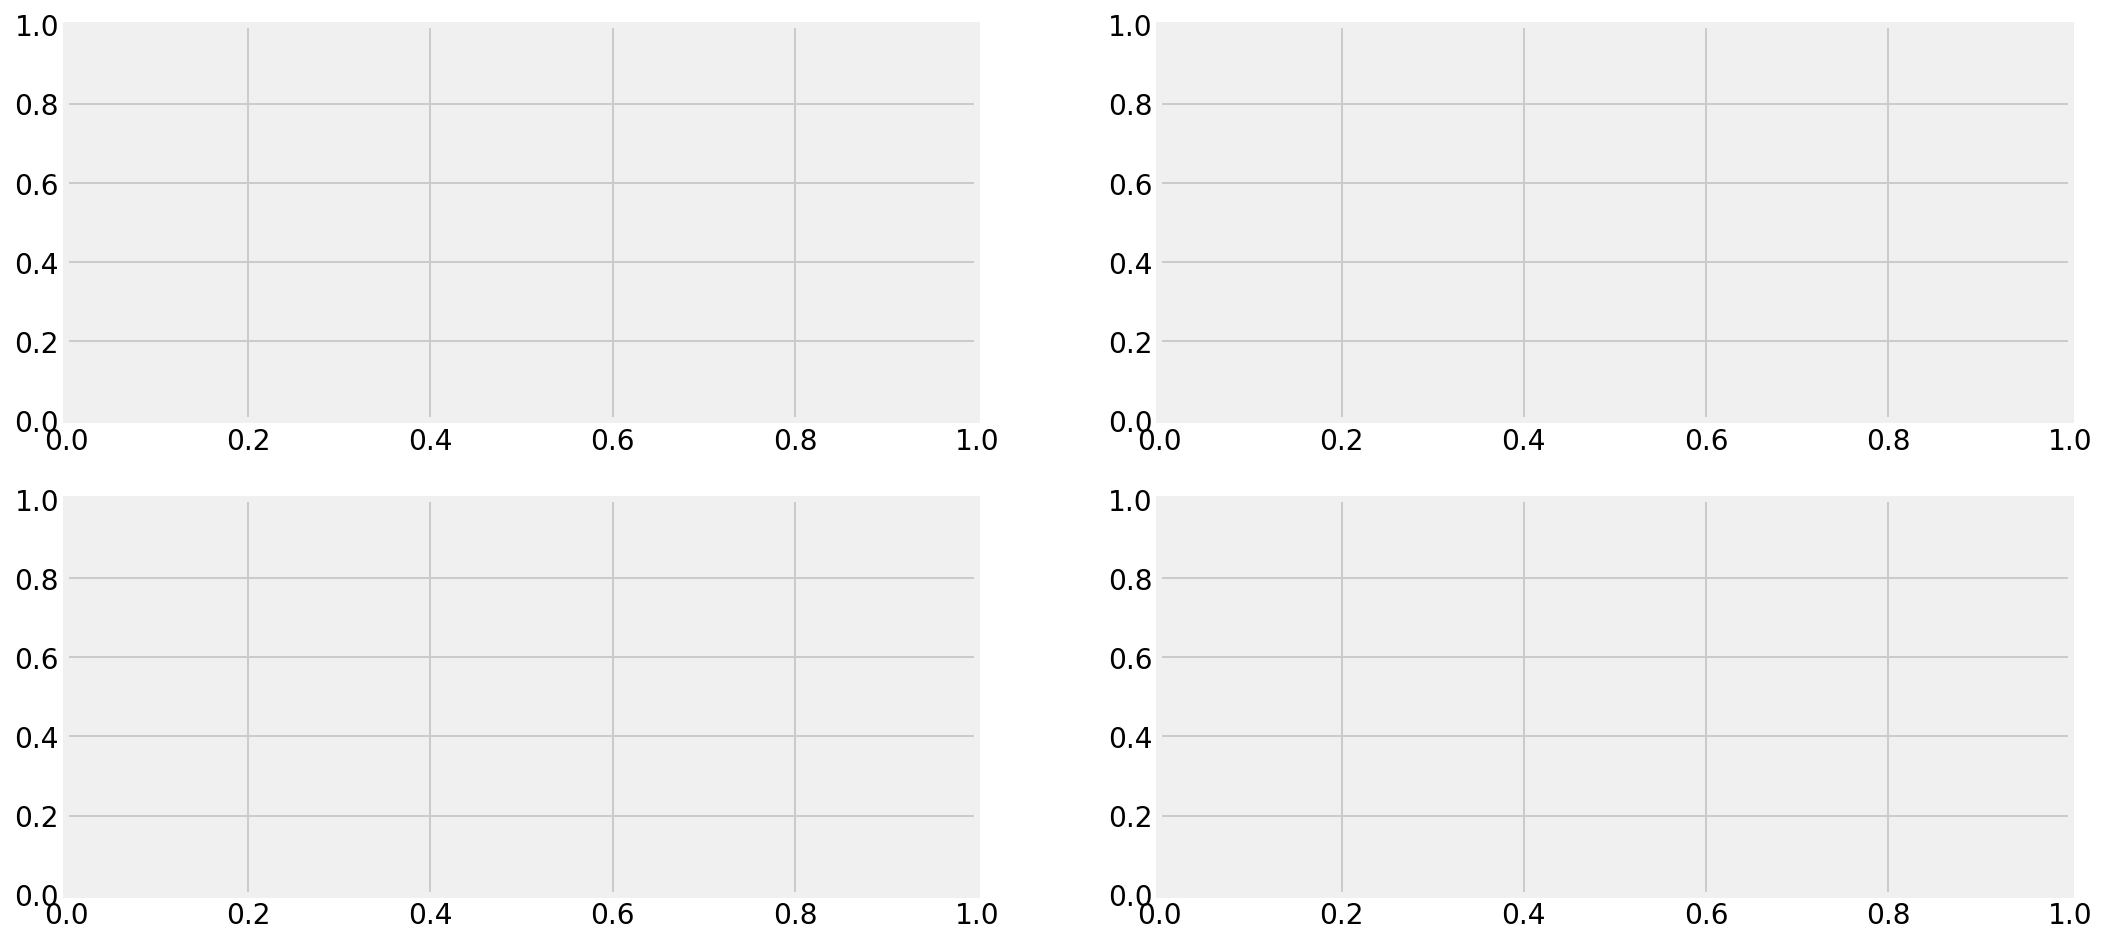

In [145]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

In [ ]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [ ]:
# List available plot styles
plt.style.available

In [ ]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Scatter plots
- Special seaborn plots
- How Matplotlib works